# Exploratory Analysis: 
1. Univariate stats: Analysis of individual data
2. Bivariate stats: analysis of interactions of 2 variables
3. Multivaraiate stats: analysis of interactions of 3+ variables

In [1]:
#importds 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

import wrangle as wr

In [2]:
telco = wr.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### Prep Work:
- making independent variables
- making dependent variable: 'Churn'

In [3]:
# first need to aquire my data:
train, validate, test = wr.split_telco_data(telco)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,did_churn
84,0135-NMXAP,Female,0,No,No,12,Yes,Yes,No,Yes,...,Yes,No,Yes,89.75,1052.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1
5021,7055-JCGNI,Female,0,No,No,70,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,111.95,7795.95,No,Two year,Fiber optic,Credit card (automatic),0
1577,2296-DKZFP,Female,0,Yes,No,65,Yes,No,Yes,Yes,...,No,Yes,No,71.00,4386.20,No,Two year,DSL,Bank transfer (automatic),0
6366,9025-AOMKI,Female,0,No,No,6,Yes,Yes,No,No,...,Yes,Yes,Yes,93.55,536.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1
3387,4817-VYYWS,Female,0,No,No,30,Yes,Yes,No,Yes,...,Yes,Yes,Yes,100.20,2983.80,Yes,Month-to-month,Fiber optic,Electronic check,1


In [4]:
# need to create a numeric column for churn
train.loc[:, 'did_churn'] = (train.churn == 'Yes').astype(int)

In [5]:
# partition out x (independent vars, features)
# partition out y (dependent var, target)

X_train = train.drop(columns=['churn','did_churn'])
y_train = train[['did_churn']]

# for utiliy: set a variable for a target varibale 
target = 'did_churn'

In [6]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the X_train data frame:
for col in train.columns:
    # if the column is an object:
    if train[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if train[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [7]:
cat_cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'did_churn']

In [8]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

In [51]:
train.churn.describe()

count     3943
unique       2
top         No
freq      2897
Name: churn, dtype: object

In [52]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

## Univariate stats: 
For the quantitiative varible: 
- I created a histogram and boxplot.
- I also added the descriptive statistics

### Numerical variables:

Distribution of tenure
count    3943.000000
mean       32.618565
std        24.626661
min         0.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


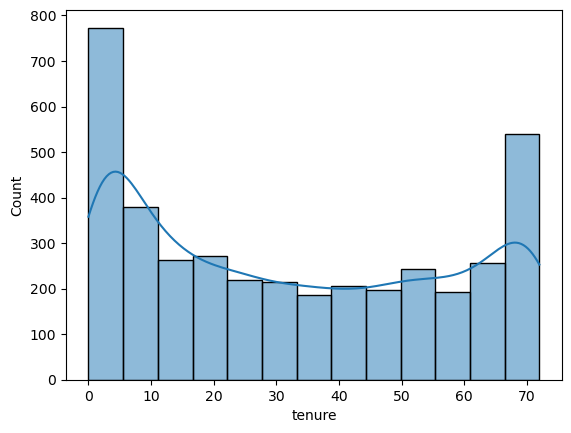

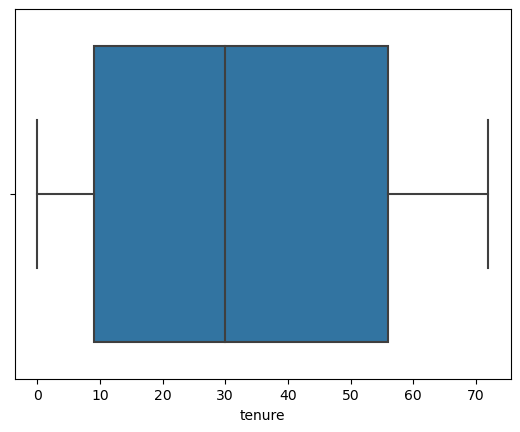

Distribution of monthly_charges
count    3943.000000
mean       64.728595
std        30.040853
min        18.700000
25%        35.950000
50%        70.200000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


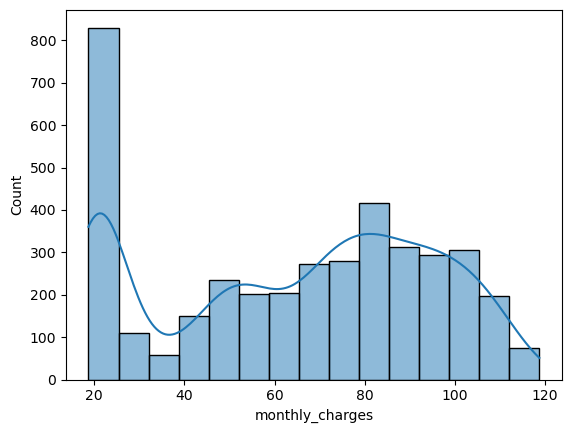

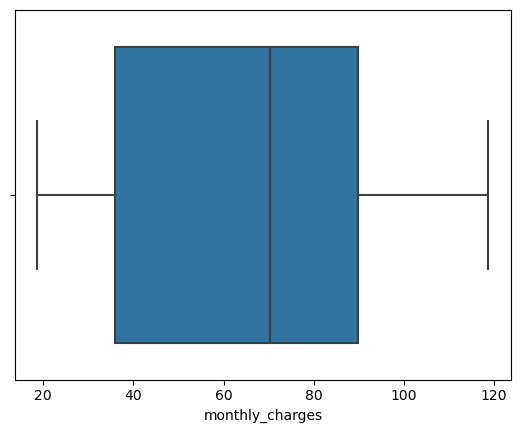

Distribution of total_charges
count     3943.000000
mean      3174.065458
std       6565.662644
min          0.000000
25%        416.350000
50%       1493.200000
75%       4138.475000
max      84050.000000
Name: total_charges, dtype: float64


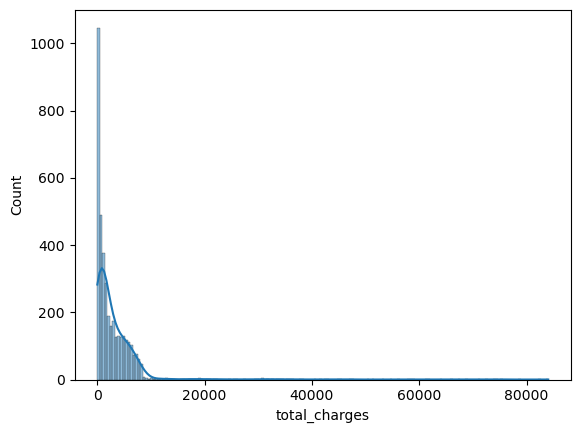

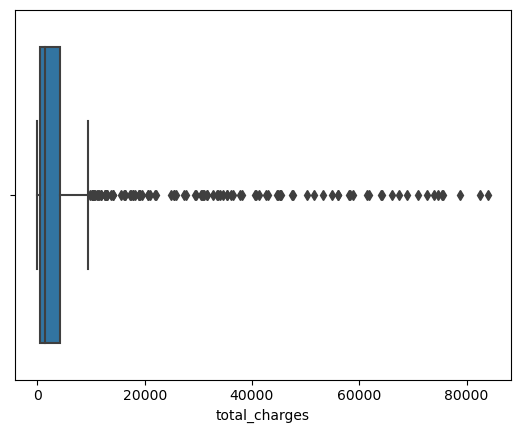

In [9]:
# making a for loop makes things go by much faster:
# Quantitative first:
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # show descriptive statistics
    print(train[col].describe())
    # first graph is a histogram: 
    sns.histplot(data=train, x = col, kde=True)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=train, x = col)
    plt.show()
    print('=======================')

##### Calculations:
1. Find out of data is normally distributed

In [10]:
# function to evaluate if distribution is normal
def eval_dist(r, p, α=0.05):
    """
    This function will take in:
    - r: the test statistic
    - p: p-value
    - α: id defaulted to 5%
    and print out if the data used to create r & p from the stats.shapiro test is normally distributed.
    """
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [11]:
# montly charges distribution:
r, p = stats.shapiro(train.monthly_charges)
r, p
eval_dist(r, p)

The data is NOT normally distributed


In [12]:
# tenure distribution:
r, p = stats.shapiro(train.tenure)
r, p
eval_dist(r, p)

The data is NOT normally distributed


In [13]:
# total charges distribution:
r, p = stats.shapiro(train.total_charges)
r, p
eval_dist(r, p)

The data is NOT normally distributed


##### Calculation functions: 

In [14]:
def evaluate_and_print_normality(data, column_name):
    """
    This function will take in a column_name, and then run a shapiro test
    """
    r, p = stats.shapiro(data[column_name])
    print(f"{column_name} distribution:")
    print("Shapiro-Wilk Test Results:")
    print(f"Statistic (r): {r}")
    print(f"P-value (p): {p}")
    print(eval_dist(r, p))

In [15]:
def normal_test(train):
    """ 
    This function will:
    - run evaluate and print normalility for a list of numerical columns
    """
    
    numerical_columns = ["tenure", "monthly_charges","total_charges"]

    for column in numerical_columns:
        evaluate_and_print_normality(train, column)

In [16]:
normal_test(train)

tenure distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.903544545173645
P-value (p): 1.8216880036222622e-44
The data is NOT normally distributed
None
monthly_charges distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9230584502220154
P-value (p): 5.713934618130874e-41
The data is NOT normally distributed
None
total_charges distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.3836866617202759
P-value (p): 0.0
The data is NOT normally distributed
None


#### Takeaways:
- Total charges has a postive skew moslty around lower total_charges.
    - There are a large amount of outliers
- Monthly charges looks to be more binomial, with peak around the lower charges. 
- Tenure shows a higher amount of customers either being new or older but a lower amount in the mean tenure range. <br>
*Calcluations:*
- None of the data is normally distributed

#### Functions:

In [17]:
def visualize_univariate_num(train, num_cols):
    for col in num_cols:
        # Print out the title
        print(f'Distribution of {col}')
        
        # Show descriptive statistics
        print(train[col].describe())
        
        # First graph is a histogram
        sns.histplot(data=train, x=col, kde=True)
        plt.show()
        
        # Second graph is a boxplot
        sns.boxplot(data=train, x=col)
        plt.show()
        
        print('=======================')

In [18]:
#explore_univariate_num(train, num_cols)

### Categorical Variables: 
- Look at the frequency of each categorical variable
- Plot a visualization that best fits the data

In [19]:
cat_cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'did_churn']

In [20]:
# look a churn specifically:
y_train.describe()

,did_churn
count,3943.000000
mean,0.265280
std,0.441538
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Frequncy of customer_id
count           3943
unique          3943
top       0135-NMXAP
freq               1
Name: customer_id, dtype: object
0135-NMXAP    1
7606-BPHHN    1
6559-PDZLR    1
0924-BJCRC    1
6994-KERXL    1
             ..
6551-GNYDG    1
7389-KBFIT    1
6425-JWTDV    1
5780-INQIK    1
8498-XXGWA    1
Name: customer_id, Length: 3943, dtype: int64


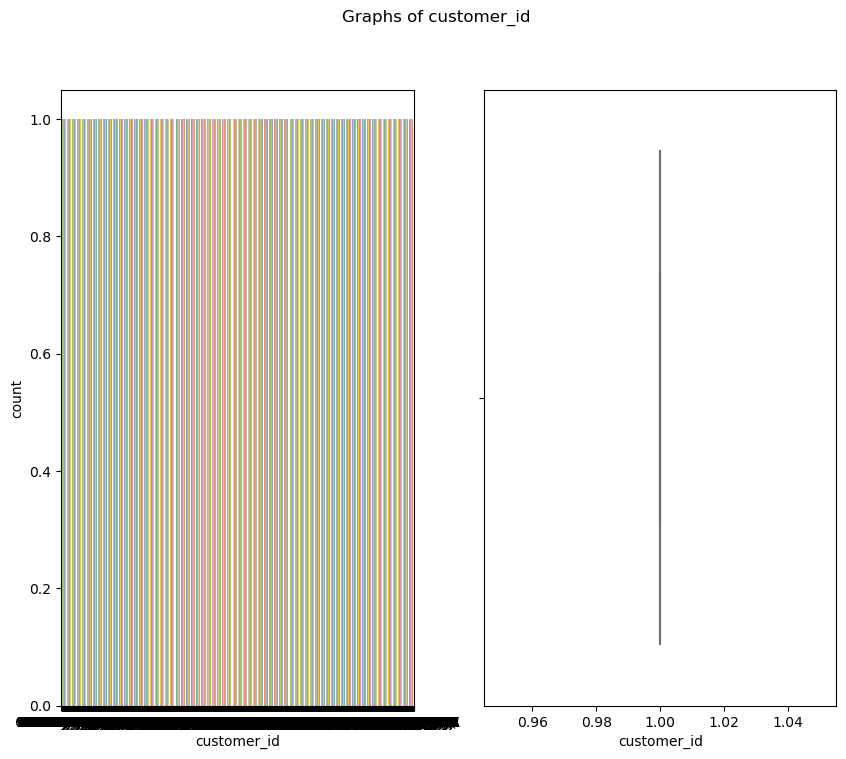

----------###---------
Frequncy of gender
count     3943
unique       2
top       Male
freq      1987
Name: gender, dtype: object
Male      1987
Female    1956
Name: gender, dtype: int64


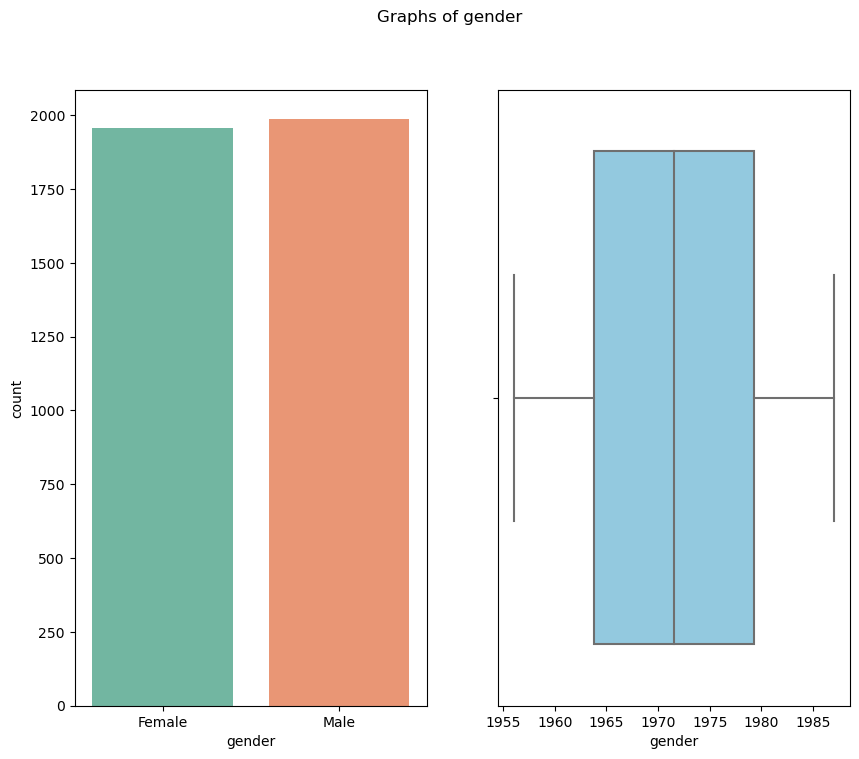

----------###---------
Frequncy of senior_citizen
count    3943.000000
mean        0.164342
std         0.370633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64
0    3295
1     648
Name: senior_citizen, dtype: int64


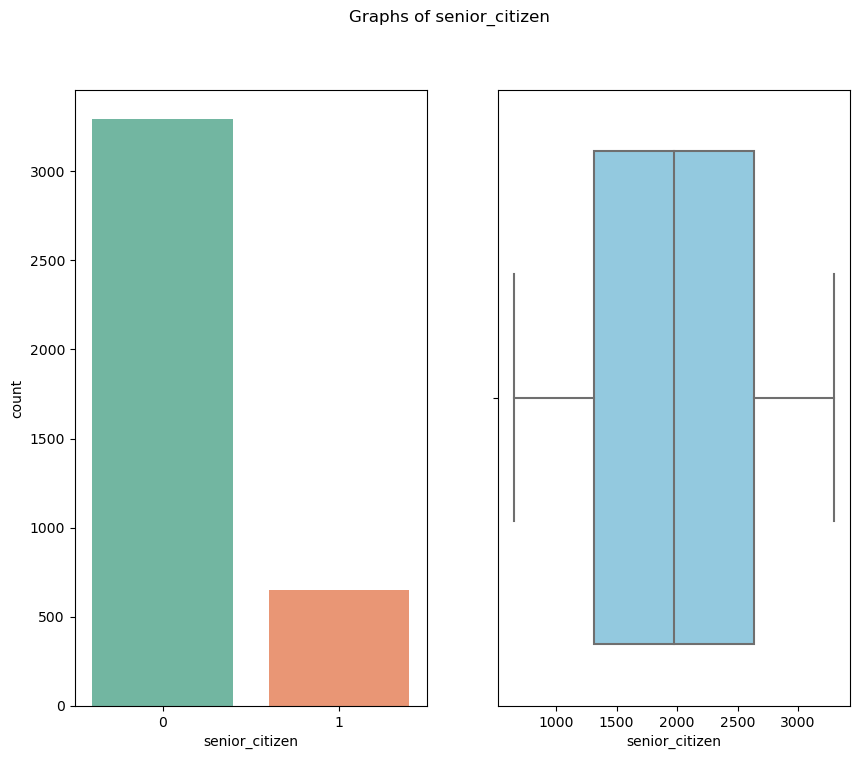

----------###---------
Frequncy of partner
count     3943
unique       2
top         No
freq      2037
Name: partner, dtype: object
No     2037
Yes    1906
Name: partner, dtype: int64


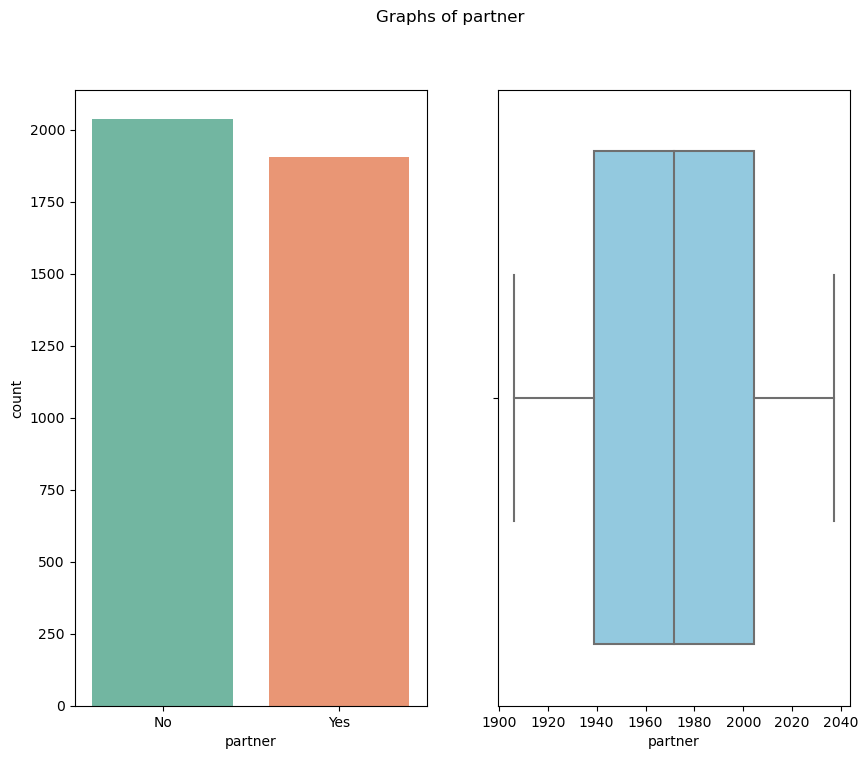

----------###---------
Frequncy of dependents
count     3943
unique       2
top         No
freq      2758
Name: dependents, dtype: object
No     2758
Yes    1185
Name: dependents, dtype: int64


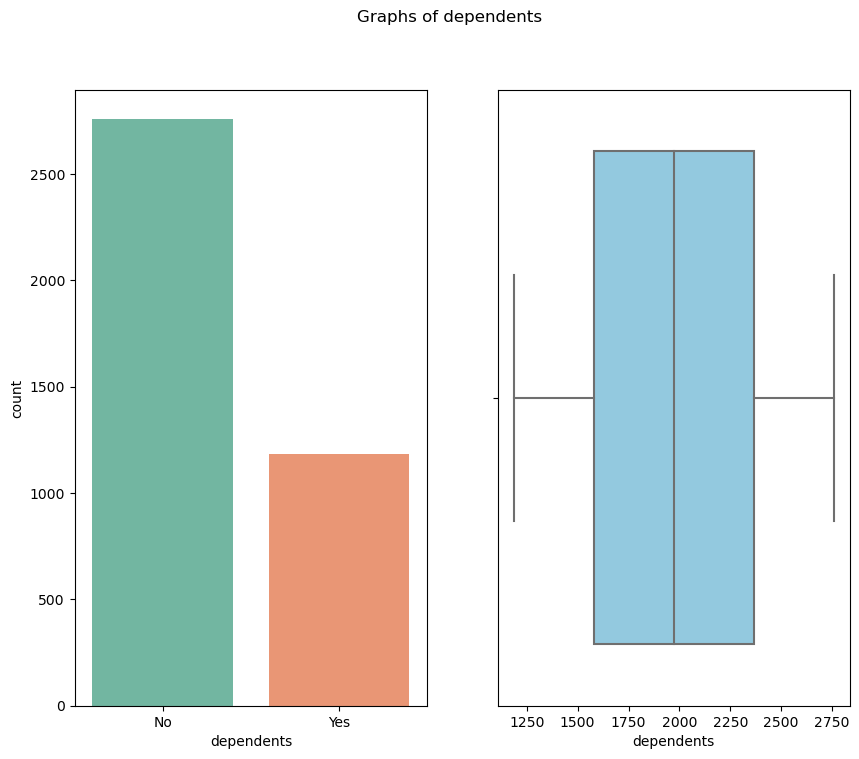

----------###---------
Frequncy of phone_service
count     3943
unique       2
top        Yes
freq      3554
Name: phone_service, dtype: object
Yes    3554
No      389
Name: phone_service, dtype: int64


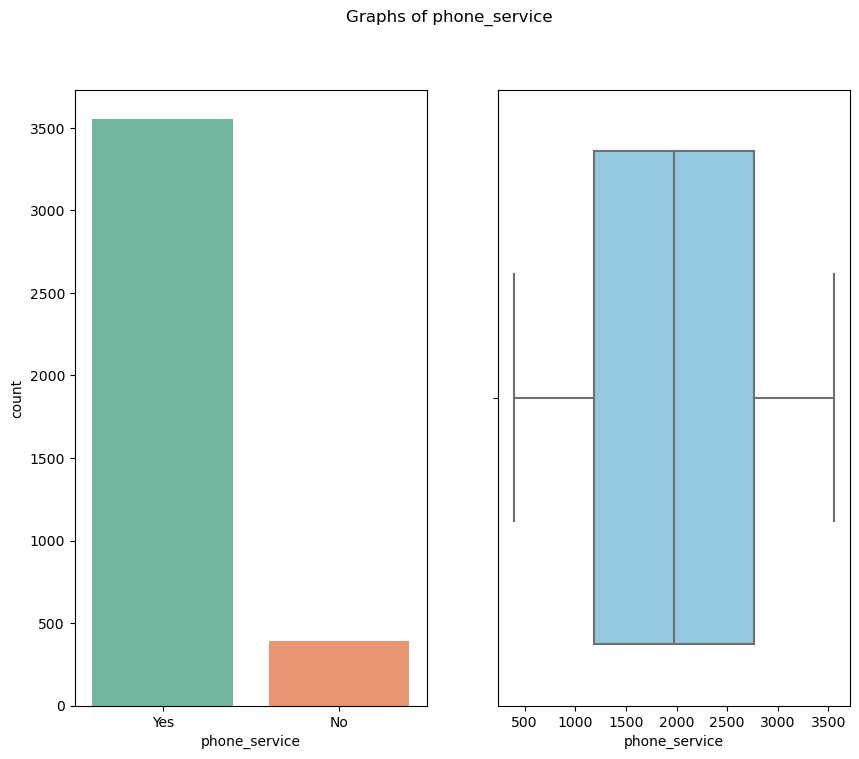

----------###---------
Frequncy of multiple_lines
count     3943
unique       3
top         No
freq      1897
Name: multiple_lines, dtype: object
No                  1897
Yes                 1657
No phone service     389
Name: multiple_lines, dtype: int64


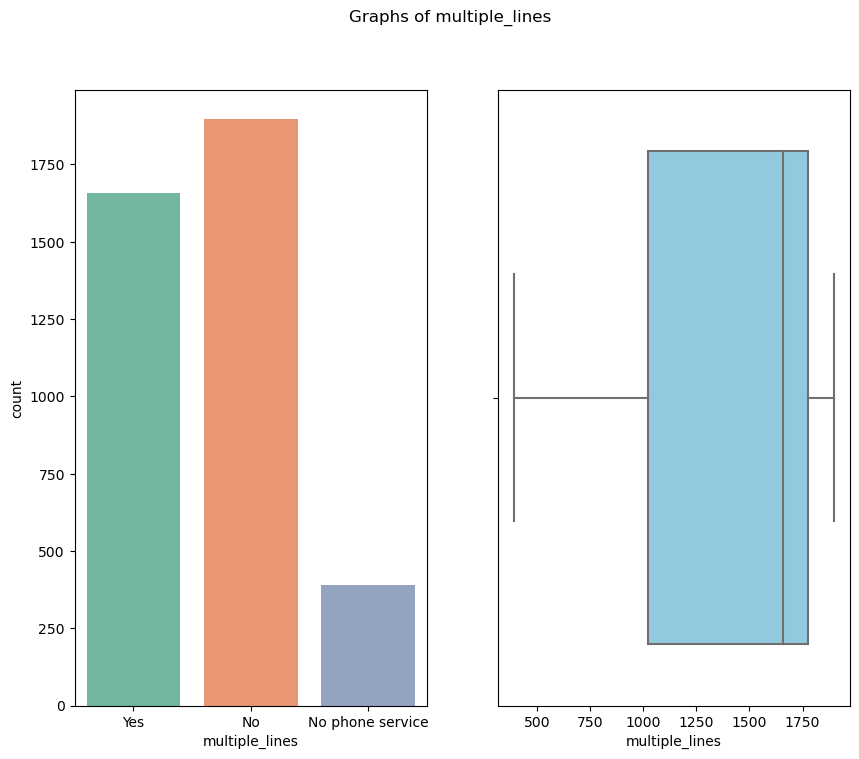

----------###---------
Frequncy of online_security
count     3943
unique       3
top         No
freq      1974
Name: online_security, dtype: object
No                     1974
Yes                    1127
No internet service     842
Name: online_security, dtype: int64


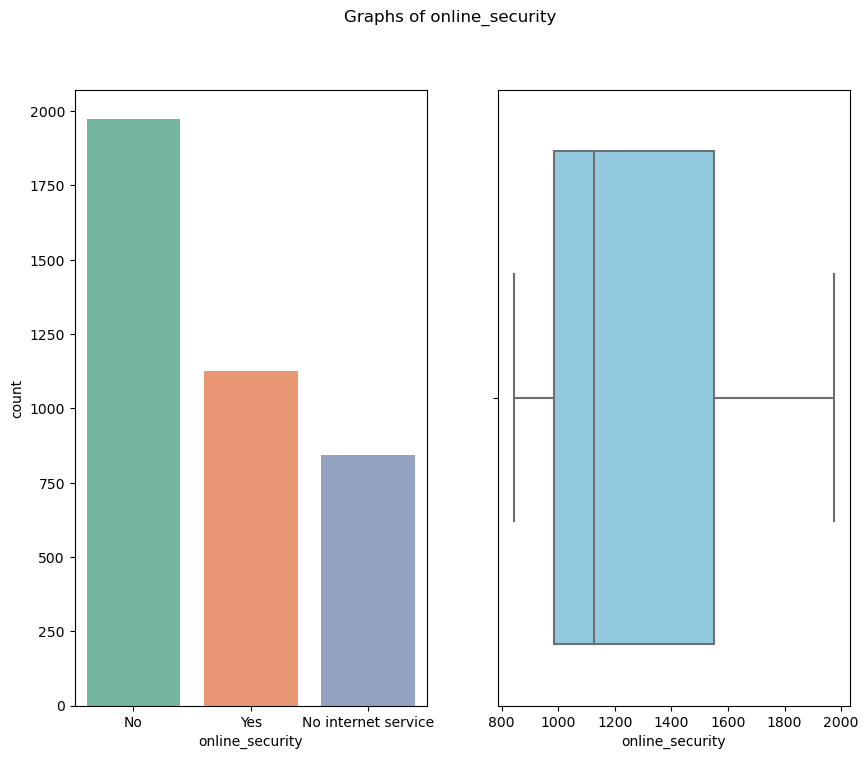

----------###---------
Frequncy of online_backup
count     3943
unique       3
top         No
freq      1712
Name: online_backup, dtype: object
No                     1712
Yes                    1389
No internet service     842
Name: online_backup, dtype: int64


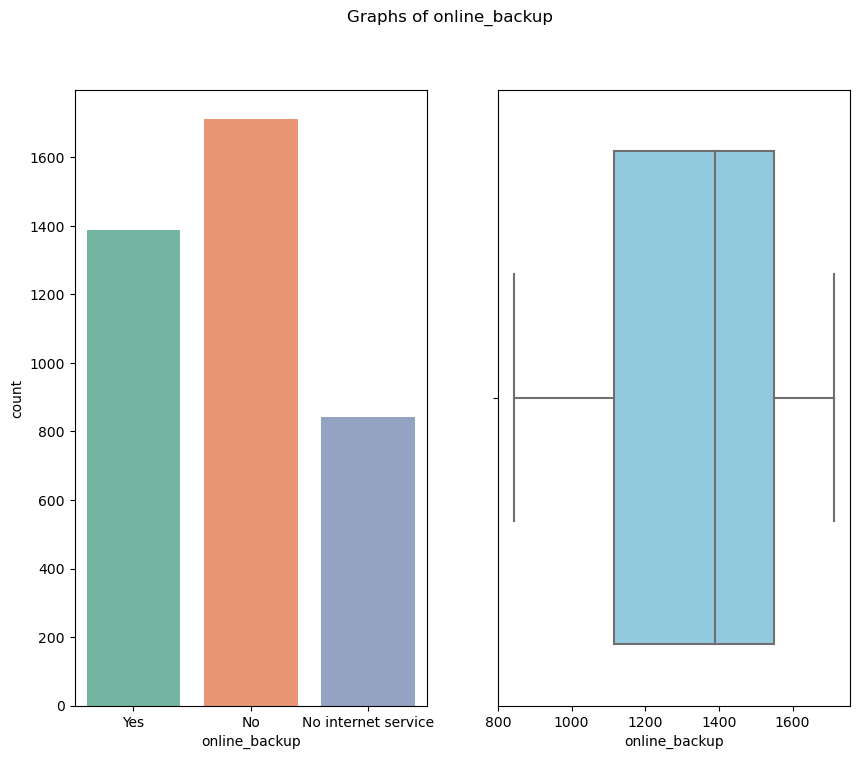

----------###---------
Frequncy of device_protection
count     3943
unique       3
top         No
freq      1746
Name: device_protection, dtype: object
No                     1746
Yes                    1355
No internet service     842
Name: device_protection, dtype: int64


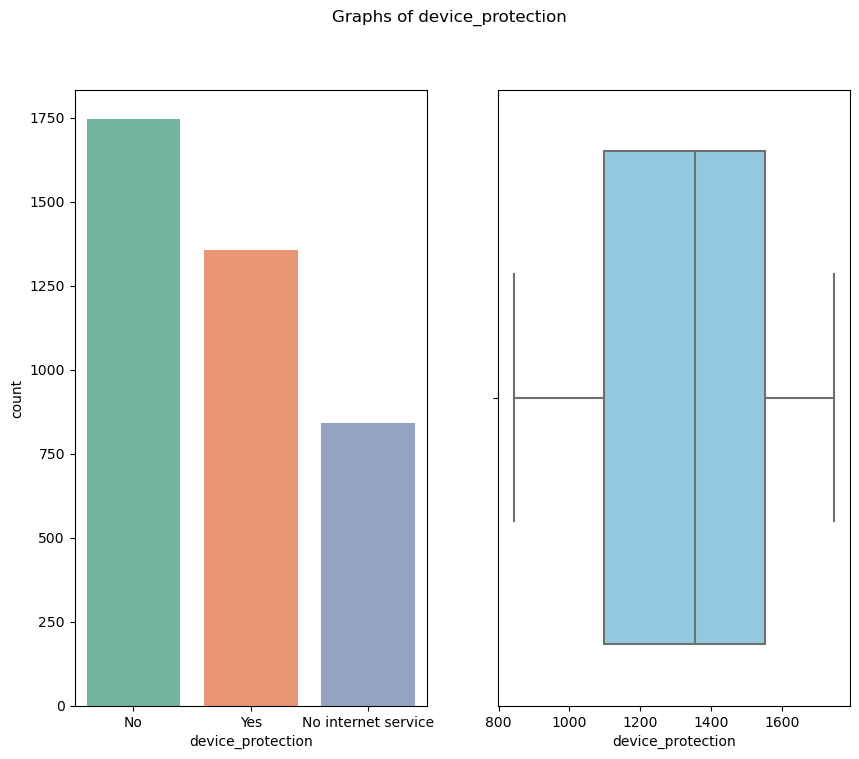

----------###---------
Frequncy of tech_support
count     3943
unique       3
top         No
freq      1967
Name: tech_support, dtype: object
No                     1967
Yes                    1134
No internet service     842
Name: tech_support, dtype: int64


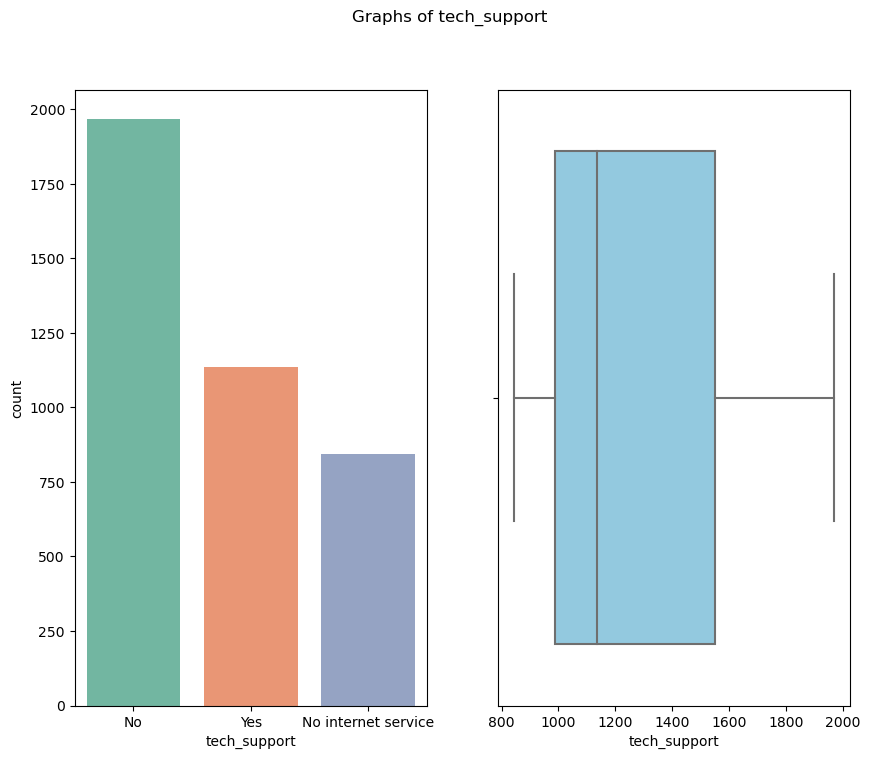

----------###---------
Frequncy of streaming_tv
count     3943
unique       3
top         No
freq      1576
Name: streaming_tv, dtype: object
No                     1576
Yes                    1525
No internet service     842
Name: streaming_tv, dtype: int64


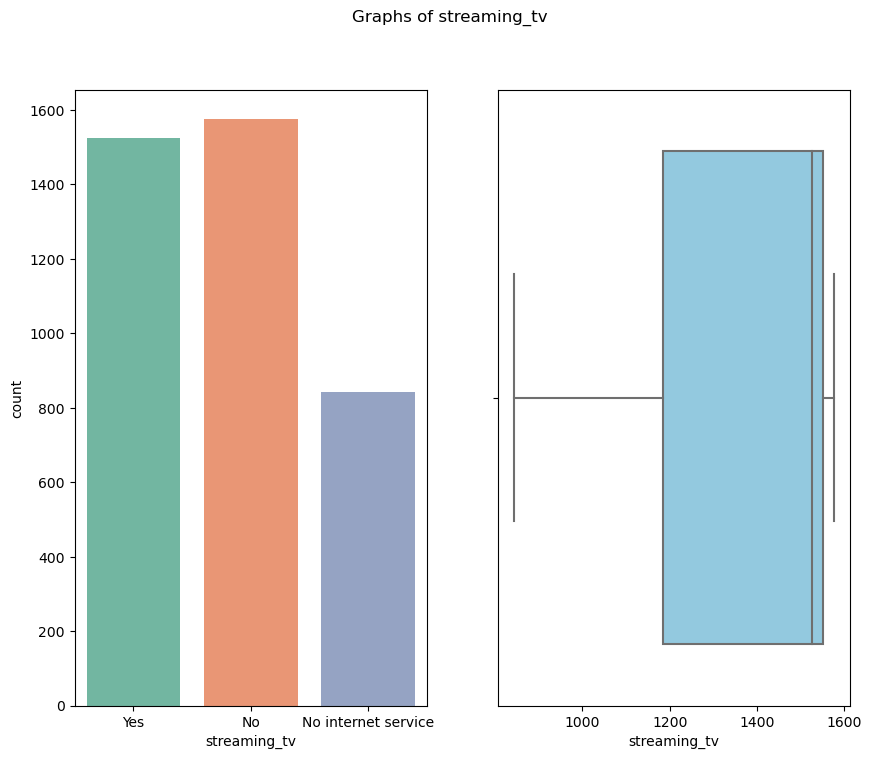

----------###---------
Frequncy of streaming_movies
count     3943
unique       3
top         No
freq      1575
Name: streaming_movies, dtype: object
No                     1575
Yes                    1526
No internet service     842
Name: streaming_movies, dtype: int64


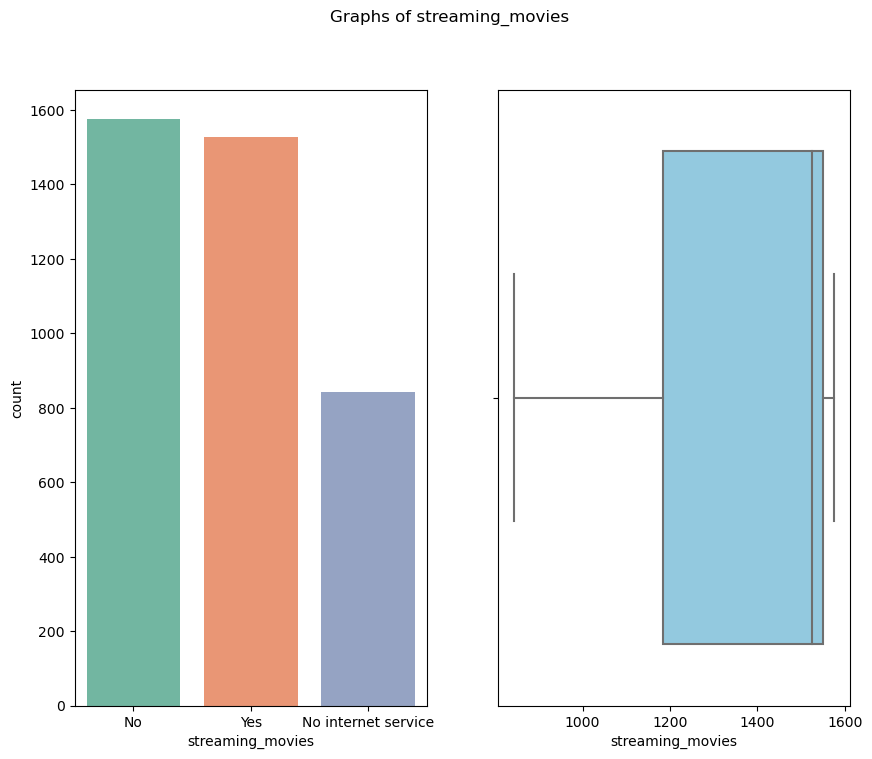

----------###---------
Frequncy of paperless_billing
count     3943
unique       2
top        Yes
freq      2317
Name: paperless_billing, dtype: object
Yes    2317
No     1626
Name: paperless_billing, dtype: int64


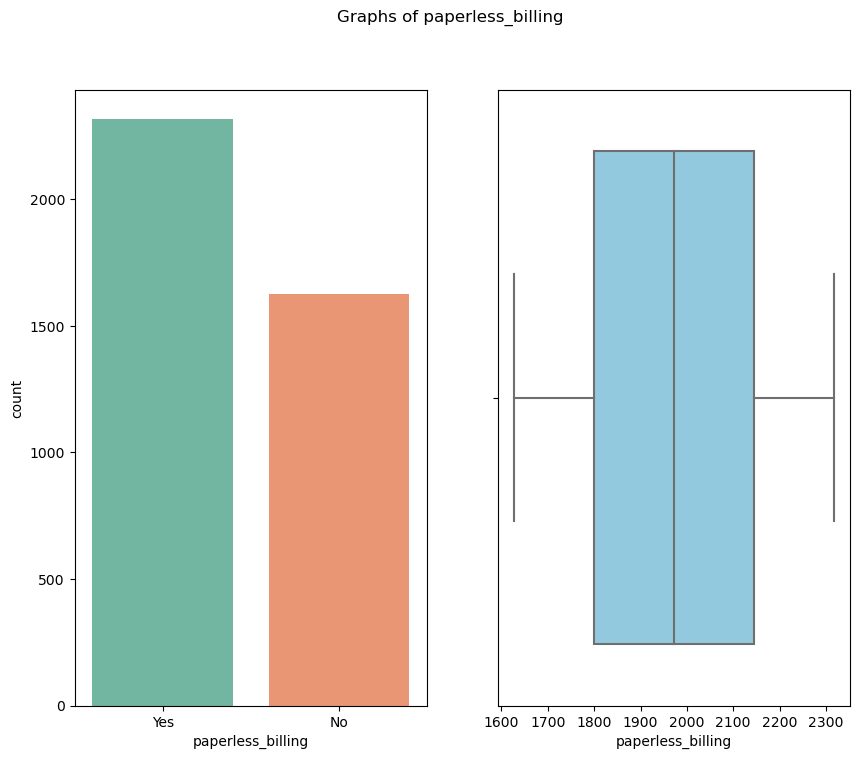

----------###---------
Frequncy of churn
count     3943
unique       2
top         No
freq      2897
Name: churn, dtype: object
No     2897
Yes    1046
Name: churn, dtype: int64


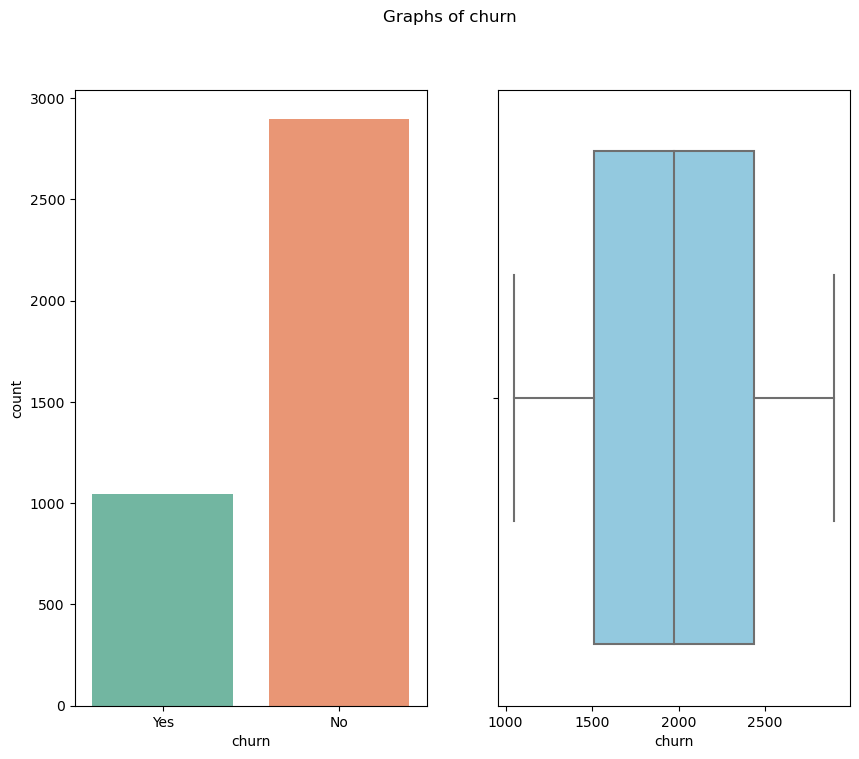

----------###---------
Frequncy of contract_type
count               3943
unique                 3
top       Month-to-month
freq                2171
Name: contract_type, dtype: object
Month-to-month    2171
Two year           946
One year           826
Name: contract_type, dtype: int64


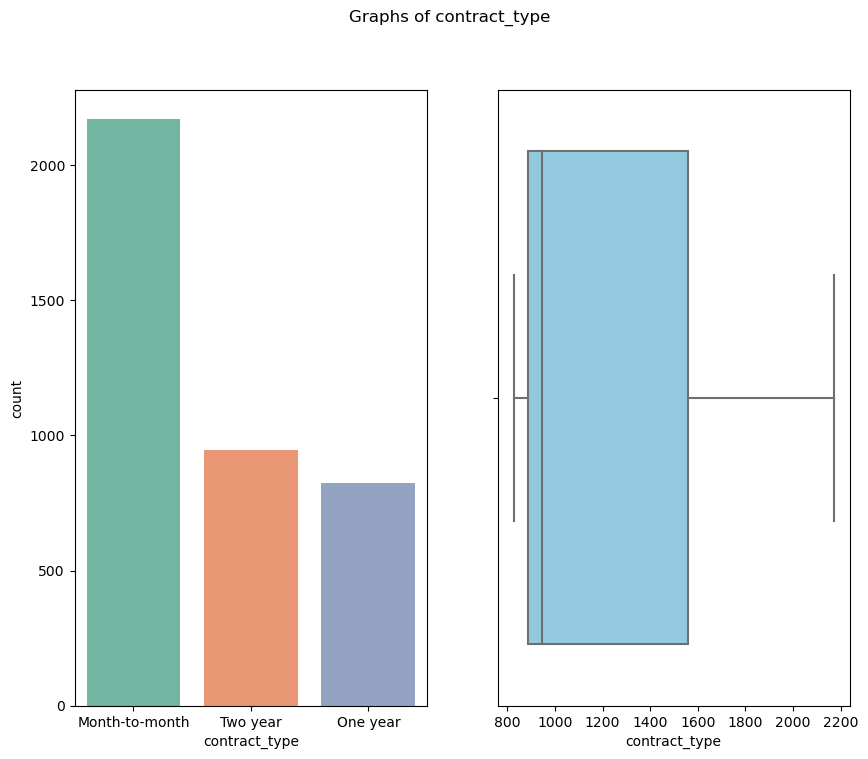

----------###---------
Frequncy of internet_service_type
count            3943
unique              3
top       Fiber optic
freq             1717
Name: internet_service_type, dtype: object
Fiber optic    1717
DSL            1384
None            842
Name: internet_service_type, dtype: int64


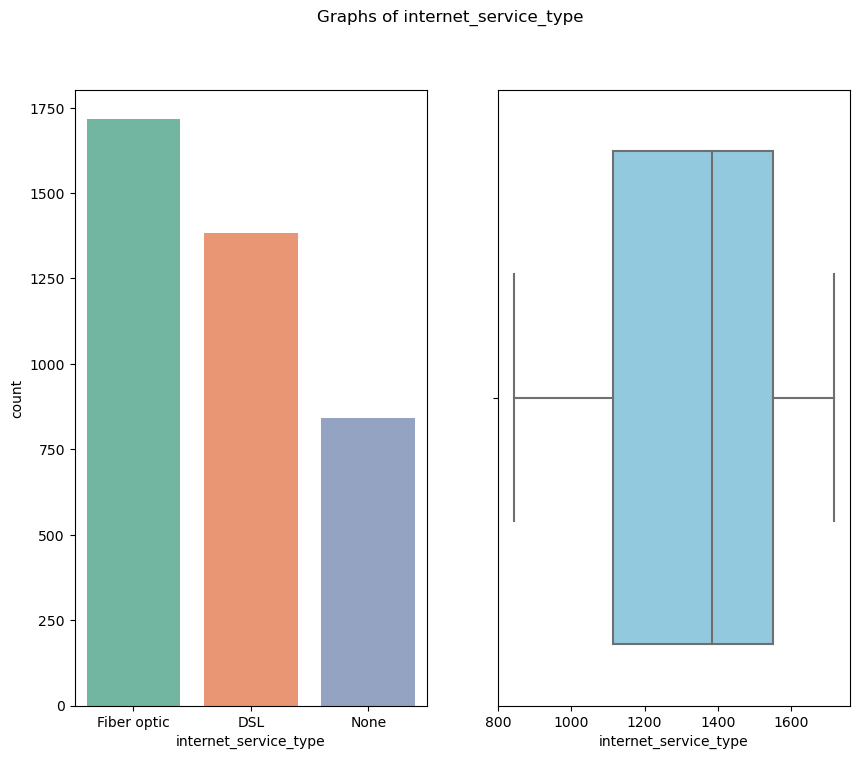

----------###---------
Frequncy of payment_type
count                 3943
unique                   4
top       Electronic check
freq                  1342
Name: payment_type, dtype: object
Electronic check             1342
Mailed check                  933
Bank transfer (automatic)     855
Credit card (automatic)       813
Name: payment_type, dtype: int64


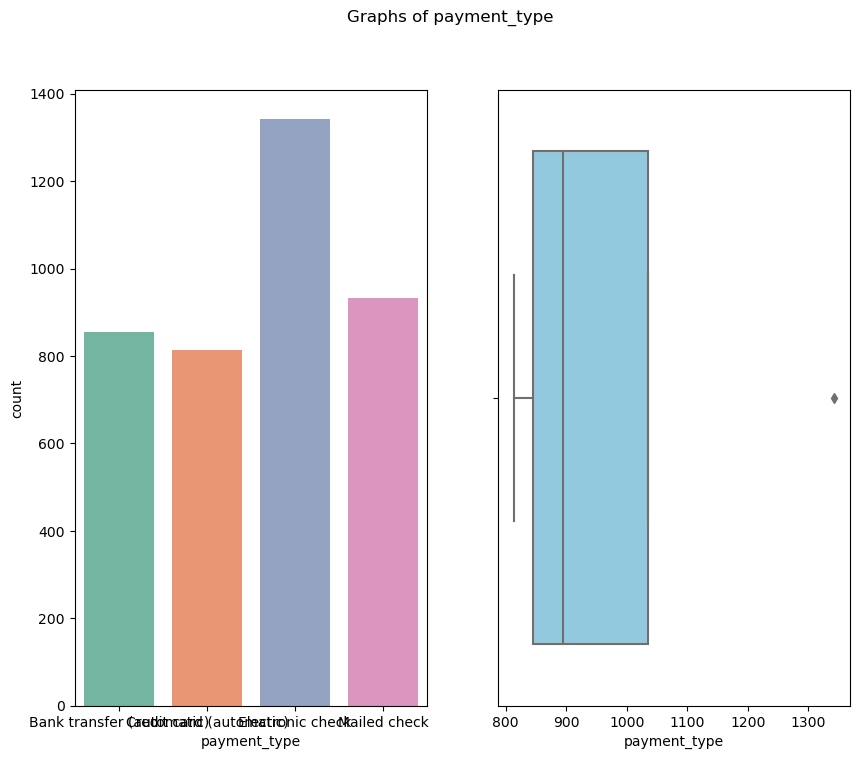

----------###---------
Frequncy of did_churn
count    3943.000000
mean        0.265280
std         0.441538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: did_churn, dtype: float64
0    2897
1    1046
Name: did_churn, dtype: int64


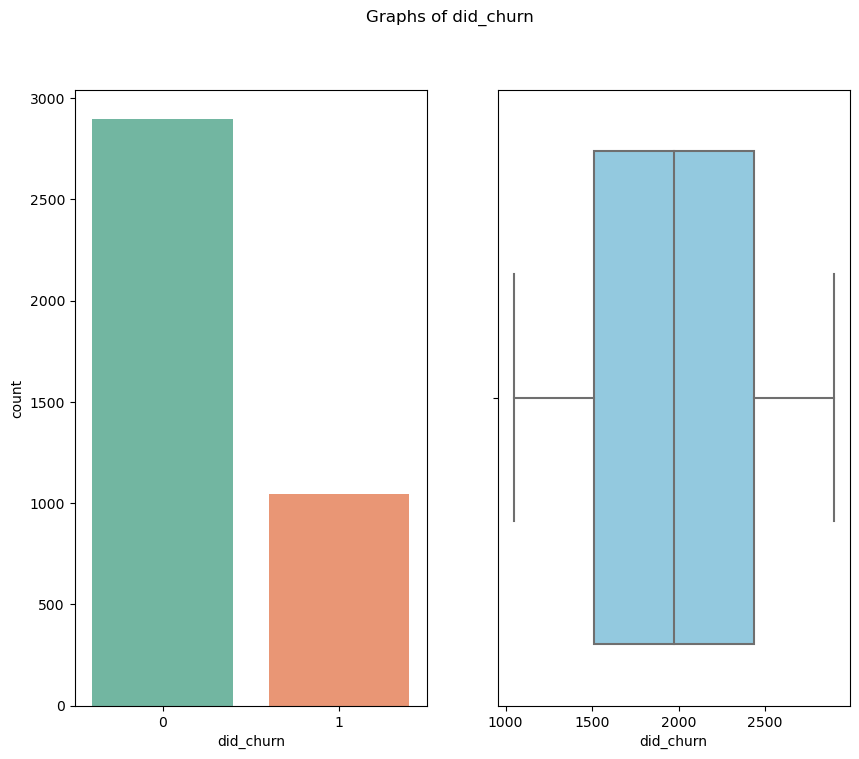

----------###---------


In [21]:
# look at all the categorical features
for col in cat_cols:
    print(f'Frequncy of {col}')
    print(train[col].describe())
    print(train[col].value_counts())
    
    #since there are multiple columns i want them to display side by side
    fig, ax = plt.subplots(1,2, figsize=(10,8))
    fig.suptitle(f'Graphs of {col}')
    
    #plot one: 
    sns.countplot(data = train, x = col, ax=ax[0], palette = 'Set2')
    
    #plot two:
    sns.boxplot(ax=ax[1], data = train, x = train[col].value_counts(), color = 'skyblue')

   
    plt.show()
    print('----------###---------')
    

#### Takeaways: 
- Customer_id can be removed from the dataframe
- Gender ratios are relatively the same
- There is start difference between senior_citzen. 0 indicates that they are not a sernior_citizen while 1 indicatest that they are. 
- Partner coutns are relatively the same
- There are not alot of dependents(individuals who dependent on thier parents) in the data. 
- There is a large amount of observations that do have phone service compared to those that dont.
- There is an even split between people who have who have dont have multiple phone lines compared to those that do, and a small protion of people that do not have phone service at all
- online security, has a higher amount of no's compared to those that do and those that do not have internet service
- there is a more even distribution of device protection, but still has higher no's.
- tech support also seems to be a feature that is not used as often.
- streaming tv seems to comparatively the same
- streaming movies seems to be comparatively the same 
- more people do paperless billing
- month to month contracts seem to be the most popular
- fiber optic is the internet service that has the most customers
- electronic check seems to be the most common payment method

#### Functions:

In [22]:
def visualize_univariate_cat_final(train, cat_cols):
    cat_cols = ['senior_citizen','contract_types','internet_service_type','payment_type','churn']
    for col in cat_cols:
        # Print the frequency of the categorical variable
        print(f'Frequency of {col}')
        print(train[col].describe())
        print(train[col].value_counts())
        
        # Create a side-by-side subplot with two plots
        fig, ax = plt.subplots(1, 2, figsize=(10, 8))
        fig.suptitle(f'Graphs of {col}')
        
        # Plot one: Countplot (bar chart)
        sns.countplot(data=train, x=col, ax=ax[0], palette='Set2')
        
        # Plot two: Boxplot
        sns.boxplot(data=train, x=col, y=train[col].value_counts(), ax=ax[1], color='skyblue')
        
        plt.show()
        print('----------###---------')

In [23]:
# create a function to visualize_univar
def visualize_univariate_cat(train, cat_cols):
    for col in cat_cols:
        # Print the frequency of the categorical variable
        print(f'Frequency of {col}')
        print(train[col].describe())
        print(train[col].value_counts())
        
        # Create a side-by-side subplot with two plots
        fig, ax = plt.subplots(1, 2, figsize=(10, 8))
        fig.suptitle(f'Graphs of {col}')
        
        # Plot one: Countplot (bar chart)
        sns.countplot(data=train, x=col, ax=ax[0], palette='Set2')
        
        # Plot two: Boxplot
        sns.boxplot(data=train, x=col, y=train[col].value_counts(), ax=ax[1], color='skyblue')
        
        plt.show()
        print('----------###---------')

In [24]:
#visualize_univariate_cat(train, cat_cols)

## Bivariate statistics
- Visualize each measurement type (y-axis) with the churn variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

### Numeric variables:

In [25]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

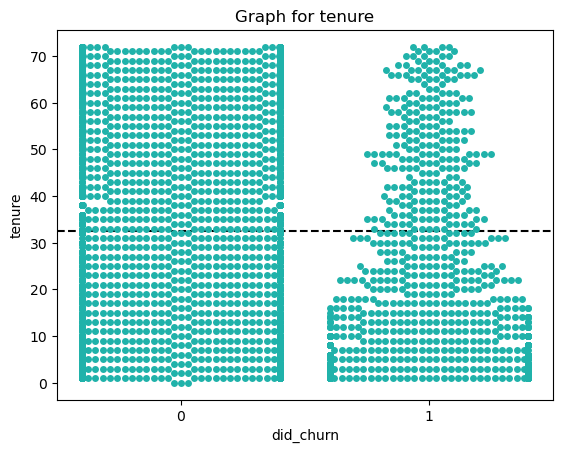

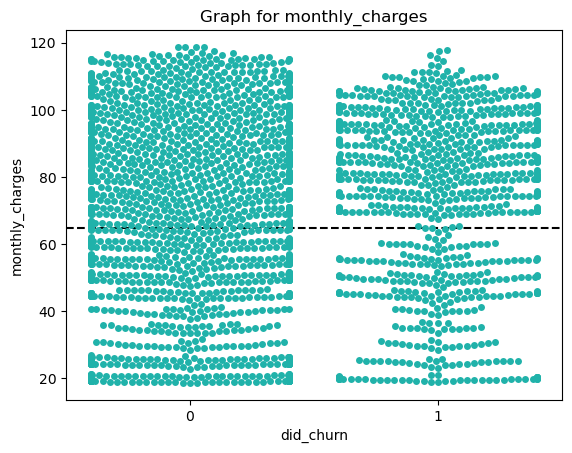

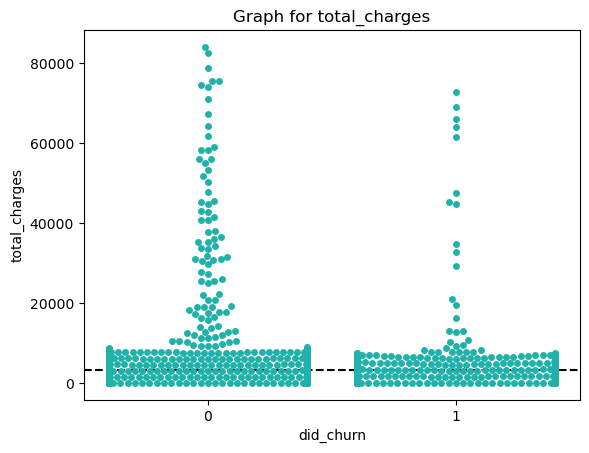

In [26]:
# swarm plot:
for col in num_cols:
    # create the plot:
    sns.swarmplot(data = train, x = target, y = col, color = 'lightseagreen')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()
    

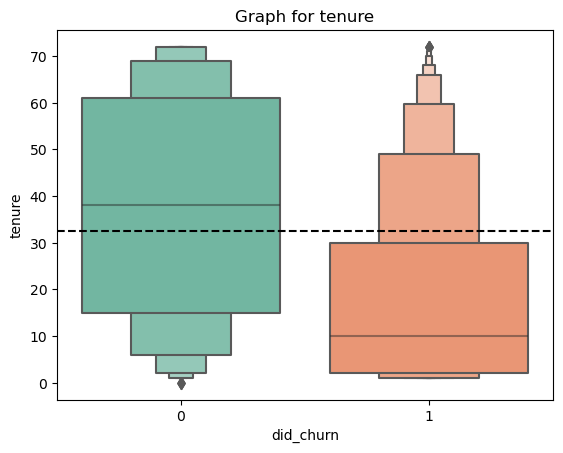

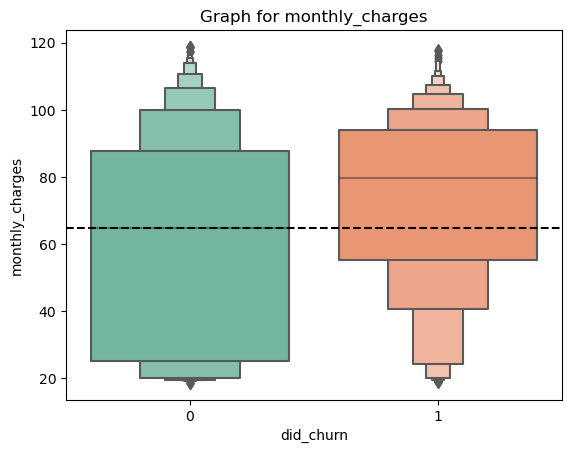

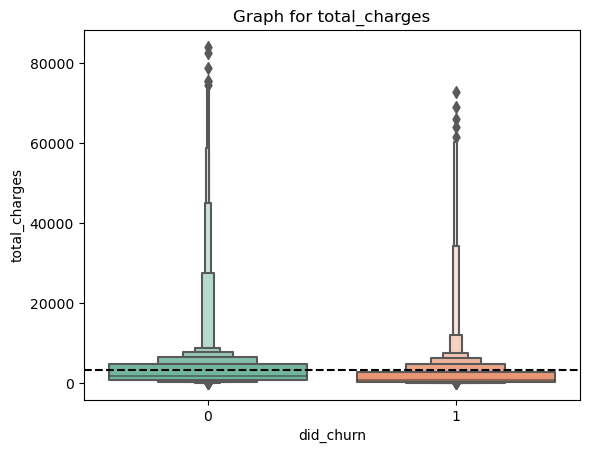

In [27]:
# boxen graph with average mean:
for col in num_cols:
    # create the plot:
    sns.boxenplot(data = train, x = target, y = col, palette = 'Set2')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()

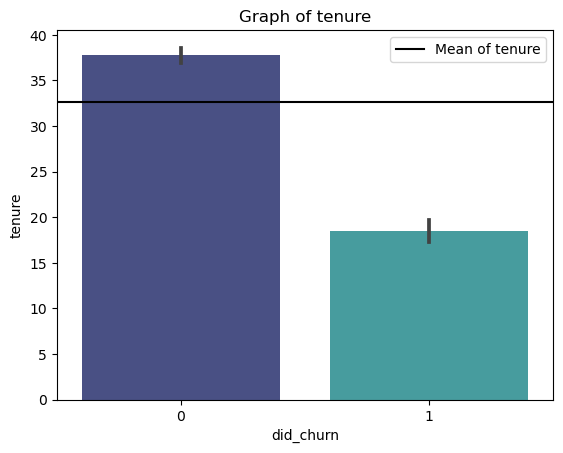

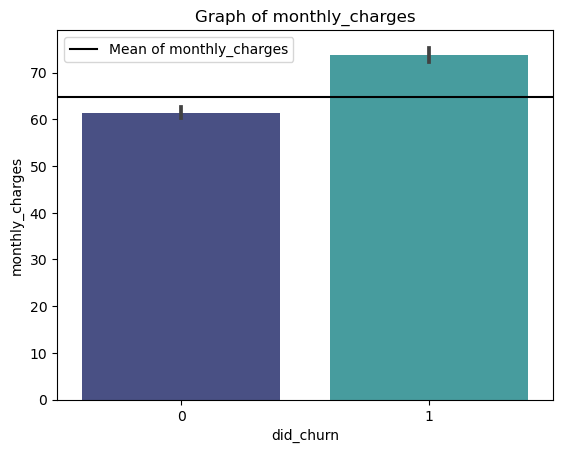

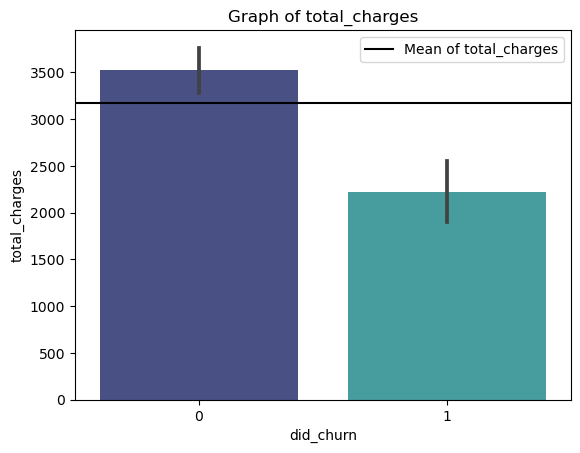

In [28]:
# bar plot
for col in num_cols:
    plt.title(f'Graph of {col}')
    sns.barplot(x = target, y = col, data = train, palette = 'mako')
    col_mean = train[col].mean()
    plt.axhline(col_mean, label = (f'Mean of {col}'), color = 'black')
    plt.legend()
    
    plt.show()

In [29]:
for col in num_cols:
    print(f'descriptive statistics for {col}')
    print(train[col].describe())

descriptive statistics for tenure
count    3943.000000
mean       32.618565
std        24.626661
min         0.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64
descriptive statistics for monthly_charges
count    3943.000000
mean       64.728595
std        30.040853
min        18.700000
25%        35.950000
50%        70.200000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64
descriptive statistics for total_charges
count     3943.000000
mean      3174.065458
std       6565.662644
min          0.000000
25%        416.350000
50%       1493.200000
75%       4138.475000
max      84050.000000
Name: total_charges, dtype: float64


##### Calculations: 
- Since we know the data is not normally distributed we have to run Mann-Whitneyu tests to compare the means. 
- Mann-Whitenyu: It is a non-parametric test that is used to compare two sample means that come from the same population, and used to test whether two sample means are equal or not.

tenure: <br>
$H_0$ : There is no difference in the mean tenure of those that churned vs those that did not churn. <br>
$H_a$: There is a significant difference in mean tenure of those that churned vs those that did not churn.


In [30]:
train[train.churn == 'No'].tenure

5021    70
1577    65
801     19
1040    45
6413    47
        ..
3215    20
3032    24
1313    10
3993    49
6016    65
Name: tenure, Length: 2897, dtype: int64

In [31]:
# run test:
stat, p_val = stats.mannwhitneyu(
    train[train.churn == 'No'].tenure,
    train[train.churn == 'Yes'].tenure)
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.


##### Function:

In [32]:
def mann_whit_test(df, num_cols):
    for col in num_cols:
        stat, p_val = stats.mannwhitneyu(
            train[train.churn == 'No'][col],
            train[train.churn == 'Yes'][col])
        print(f'Mann-Whitneyu test for {col}')
        if p_val < 0.05:
            print('We can reject the null hypothesis; the means are different.')
        else:
            print('We cannot reject the null hypothesis')

In [33]:
mann_whit_test(train, num_cols)

Mann-Whitneyu test for tenure
We can reject the null hypothesis; the means are different.
Mann-Whitneyu test for monthly_charges
We can reject the null hypothesis; the means are different.
Mann-Whitneyu test for total_charges
We can reject the null hypothesis; the means are different.


In [34]:
def eval_Spearmanresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")

In [35]:
# pearsons test to find a relationship between churn and data: 
for col in num_cols:
    print(f'spearman test for {col}')
    r, p = stats.spearmanr(telco[col], telco.churn)
    eval_Spearmanresult(r,p)
    

spearman test for tenure
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.367062.
P-value: 1.404616769950862e-223
spearman test for monthly_charges
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.184743.
P-value: 4.132385749669321e-55
spearman test for total_charges
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.224542.
P-value: 3.365543120157843e-81


In [36]:
r, p = stats.spearmanr(telco.monthly_charges, telco.churn)
eval_Spearmanresult(r, p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.184743.
P-value: 4.132385749669321e-55


#### Takeaways:
- Tenure does not seem to influence churn
- **Monthly_Charges** is an important facotr to look at
- Total charges also does not seem to influence churn

#### Functions: 

In [37]:
def visualize_bivariate_num(train, num_cols):
    '''
    This function will:
    - create a swarm plot
    - create a boxen plot
    - create a bar plot
    - and give descriptive stats 
    - of numerical columns in the train data set
    '''
    for col in num_cols:
        # Swarm plot
        plt.figure(figsize=(8, 5))
        sns.swarmplot(data=train, x=target, y=col, color='lightseagreen')
        plt.title(f'Graph for {col}')
        average = train[col].mean()
        plt.axhline(average, ls='--', color='black')
        plt.show()
        
        # Boxen plot
        plt.figure(figsize=(8, 5))
        sns.boxenplot(data=train, x=target, y=col, palette='Set2')
        plt.title(f'Graph for {col}')
        average = train[col].mean()
        plt.axhline(average, ls='--', color='black')
        plt.show()
        
        # Bar plot
        plt.figure(figsize=(8, 5))
        plt.title(f'Graph of {col}')
        sns.barplot(x=target, y=col, data=train, palette='mako')
        col_mean = train[col].mean()
        plt.axhline(col_mean, label=f'Mean of {col}', color='black')
        plt.legend()
        plt.show()
        
        # Descriptive statistics
        print(f'Descriptive statistics for {col}')
        print(train[col].describe())
        print('=====================================')
        
        #Mann-Whitney test 
        mann_whit_test(train,num_cols)


In [38]:
#visualize_bivariate_num(train, num_cols)

### Categorical Varibales:

In [39]:
cat_cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'did_churn']

In [40]:
# need to create a numeric column for churn
train.loc[:, 'did_churn'] = (train.churn == 'Yes').astype(int)

gender vs if they did churn


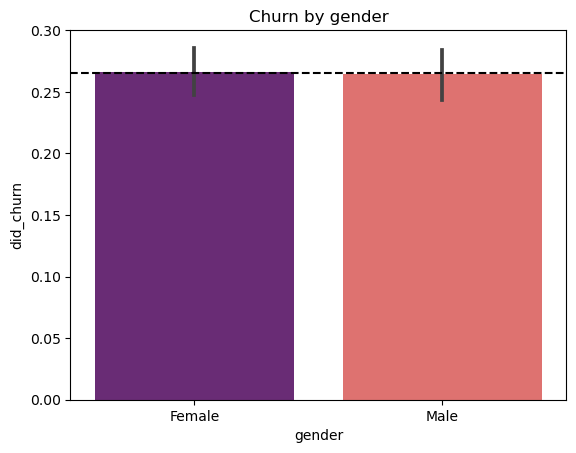

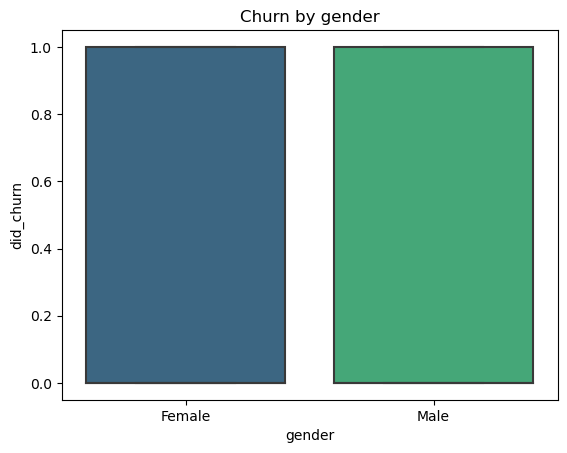

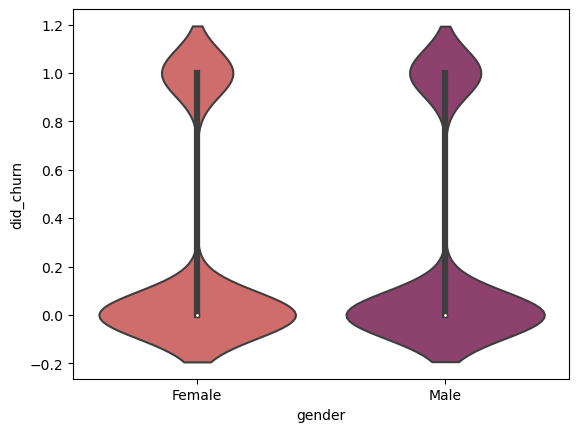

count     3943
unique       2
top       Male
freq      1987
Name: gender, dtype: object
-------------------------------
senior_citizen vs if they did churn


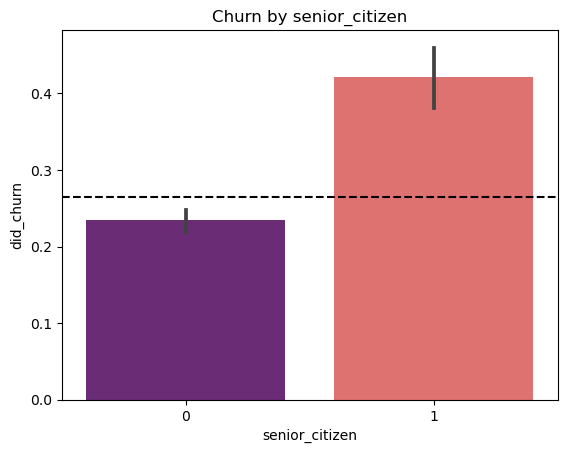

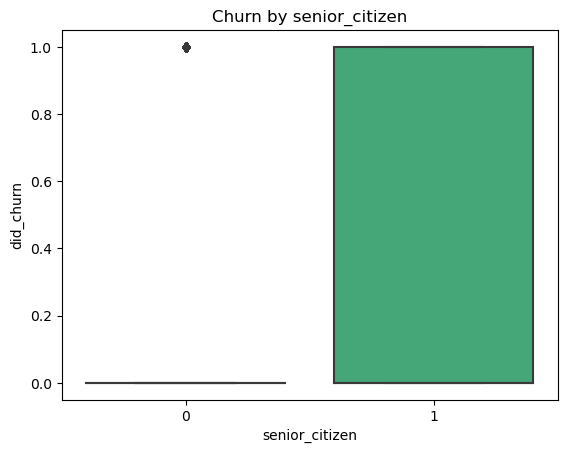

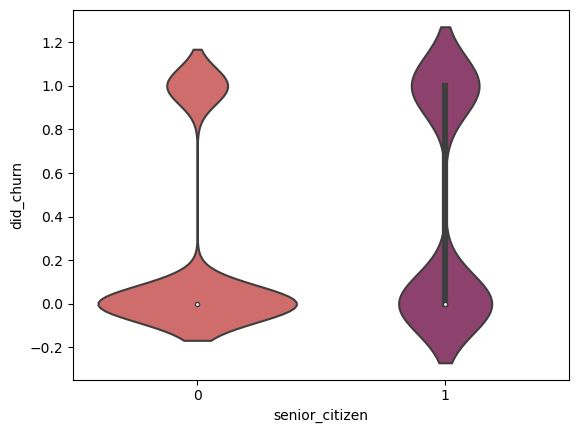

count    3943.000000
mean        0.164342
std         0.370633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64
-------------------------------
partner vs if they did churn


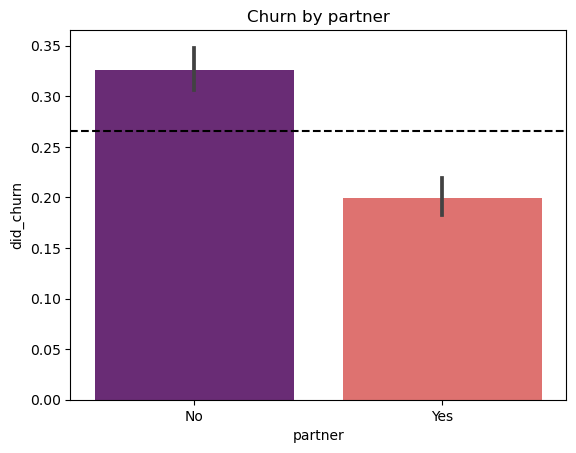

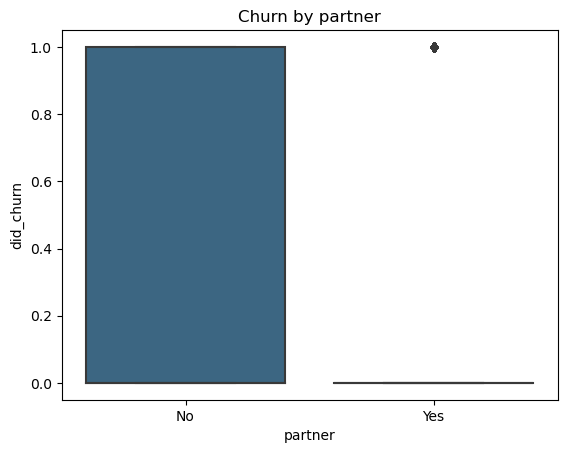

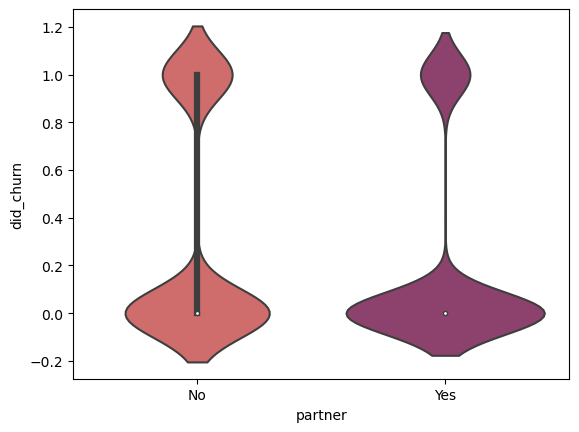

count     3943
unique       2
top         No
freq      2037
Name: partner, dtype: object
-------------------------------
dependents vs if they did churn


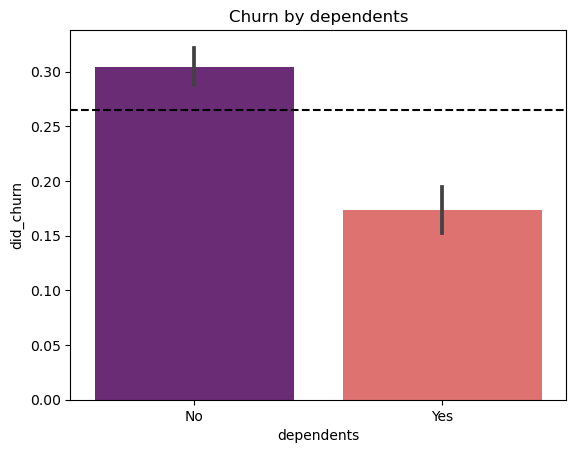

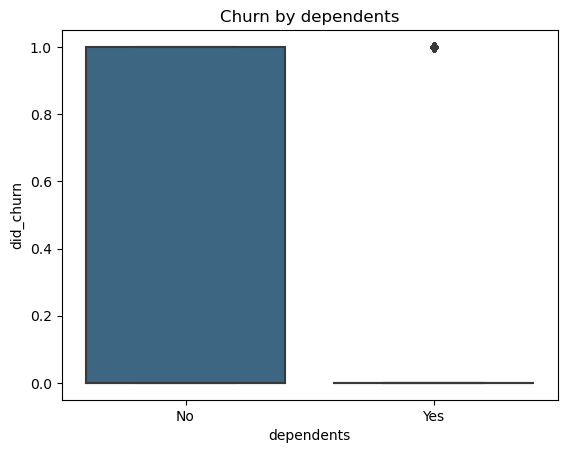

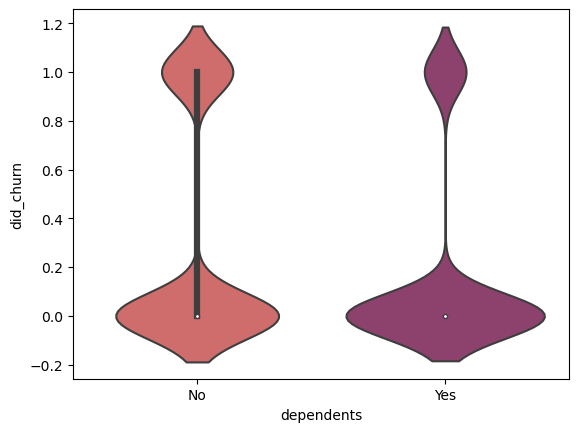

count     3943
unique       2
top         No
freq      2758
Name: dependents, dtype: object
-------------------------------
phone_service vs if they did churn


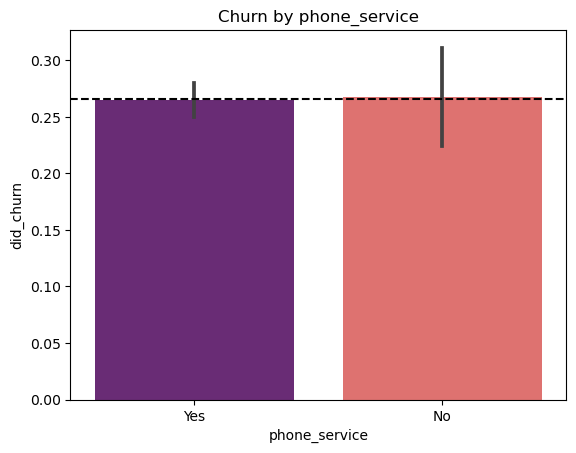

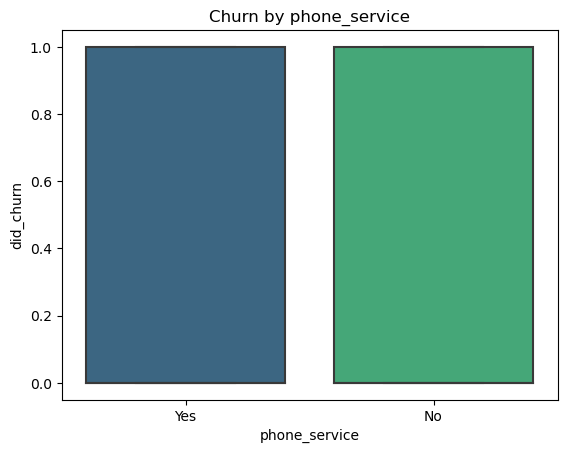

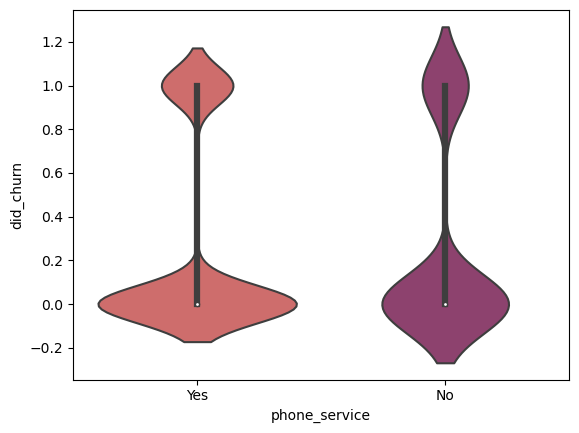

count     3943
unique       2
top        Yes
freq      3554
Name: phone_service, dtype: object
-------------------------------
multiple_lines vs if they did churn


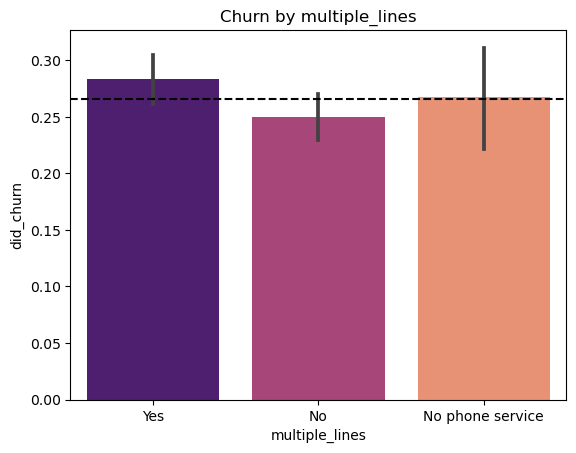

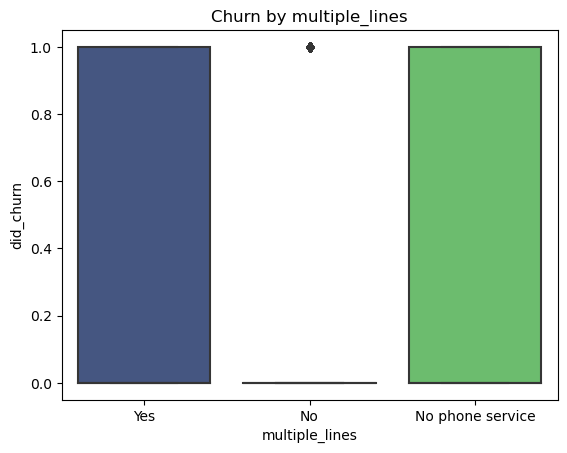

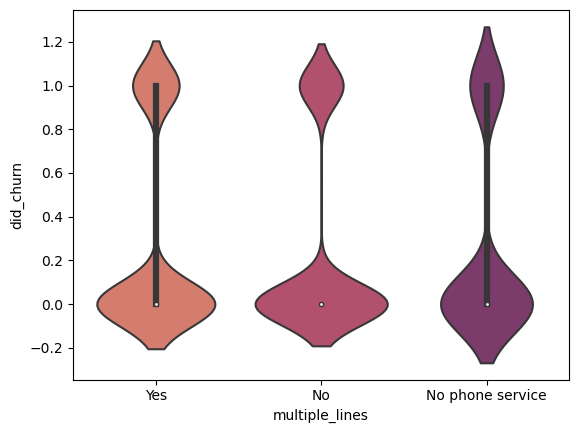

count     3943
unique       3
top         No
freq      1897
Name: multiple_lines, dtype: object
-------------------------------
online_security vs if they did churn


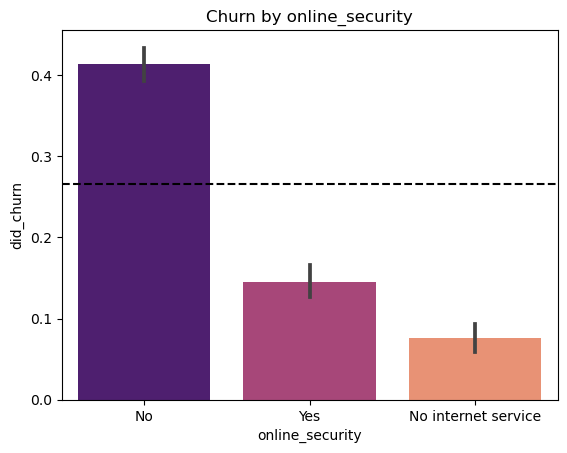

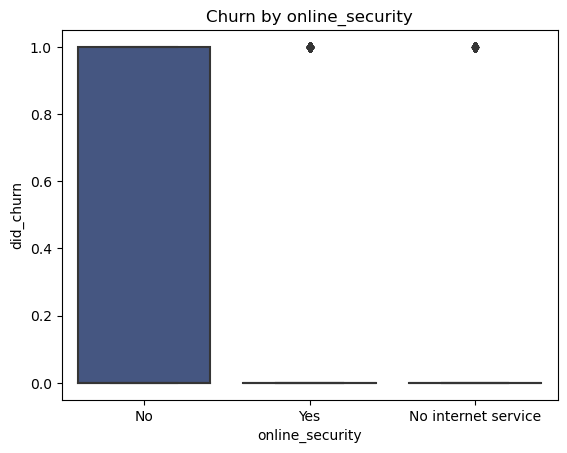

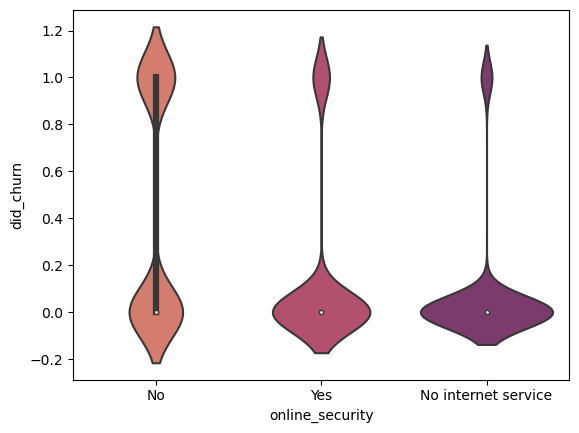

count     3943
unique       3
top         No
freq      1974
Name: online_security, dtype: object
-------------------------------
online_backup vs if they did churn


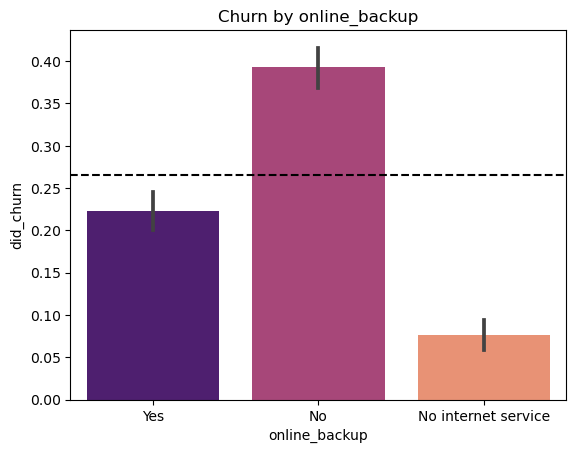

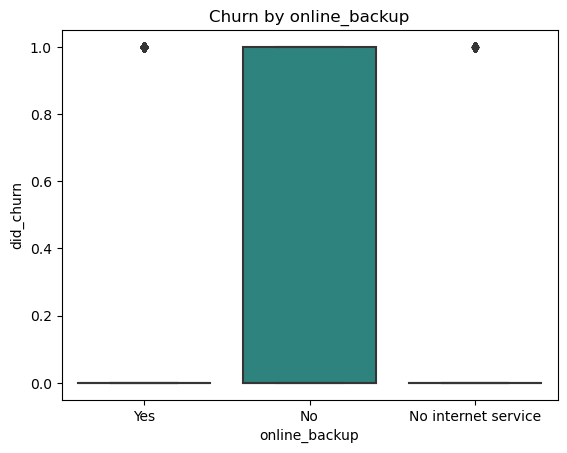

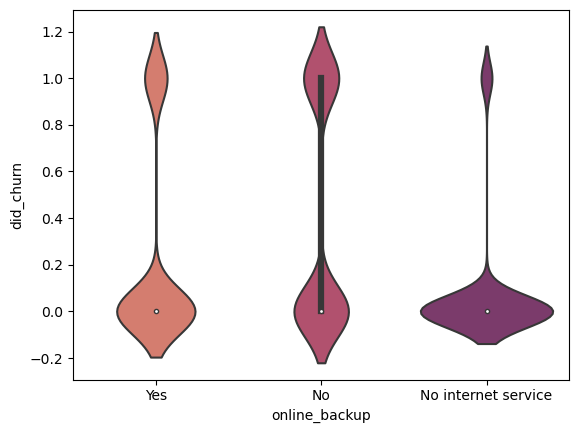

count     3943
unique       3
top         No
freq      1712
Name: online_backup, dtype: object
-------------------------------
device_protection vs if they did churn


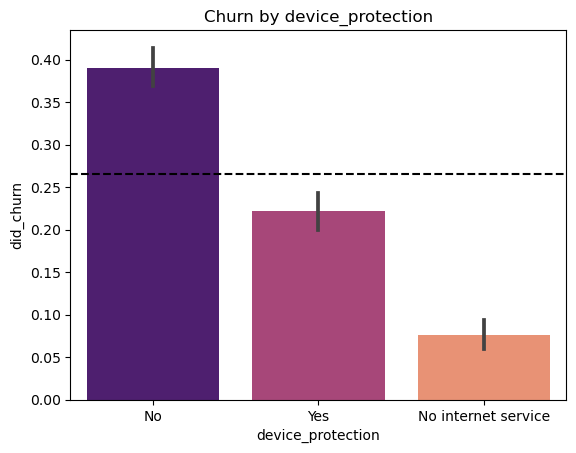

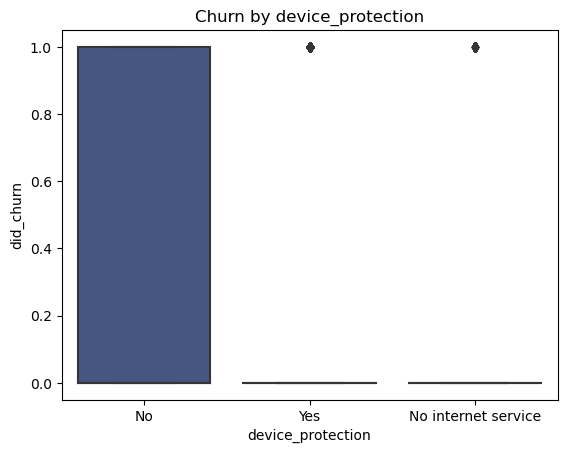

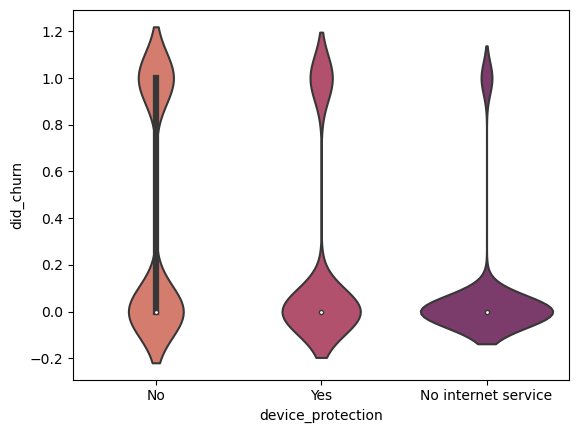

count     3943
unique       3
top         No
freq      1746
Name: device_protection, dtype: object
-------------------------------
tech_support vs if they did churn


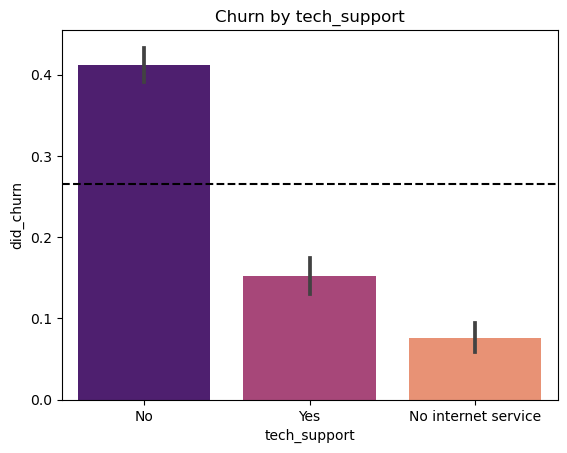

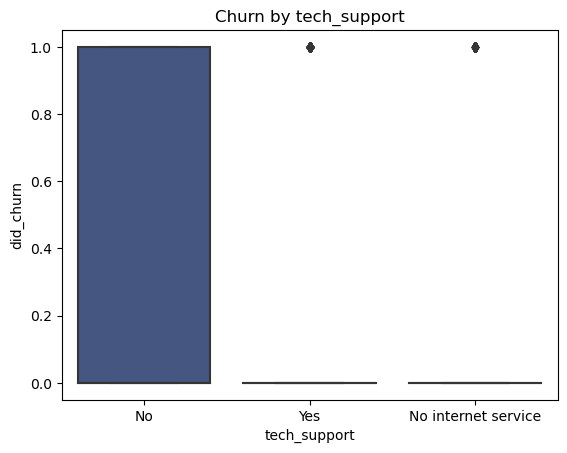

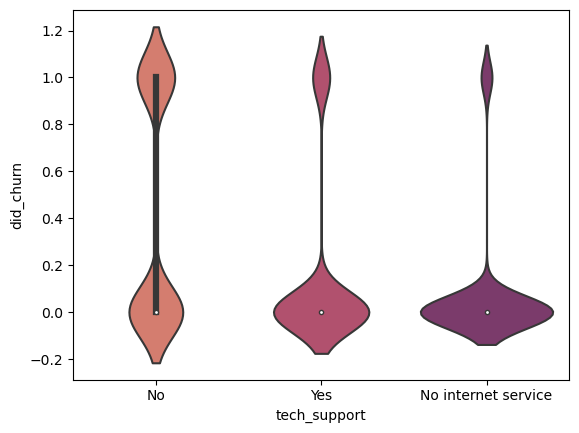

count     3943
unique       3
top         No
freq      1967
Name: tech_support, dtype: object
-------------------------------
streaming_tv vs if they did churn


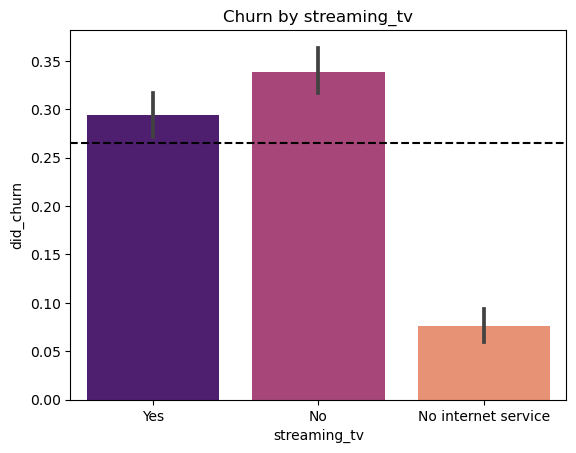

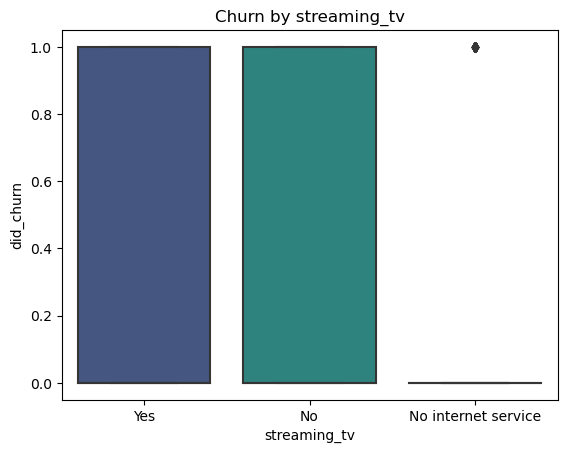

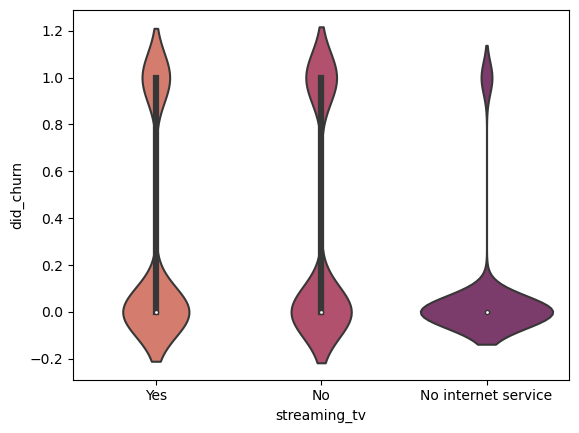

count     3943
unique       3
top         No
freq      1576
Name: streaming_tv, dtype: object
-------------------------------
streaming_movies vs if they did churn


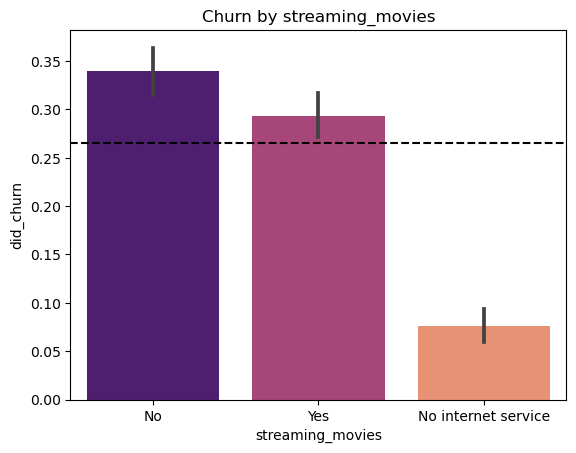

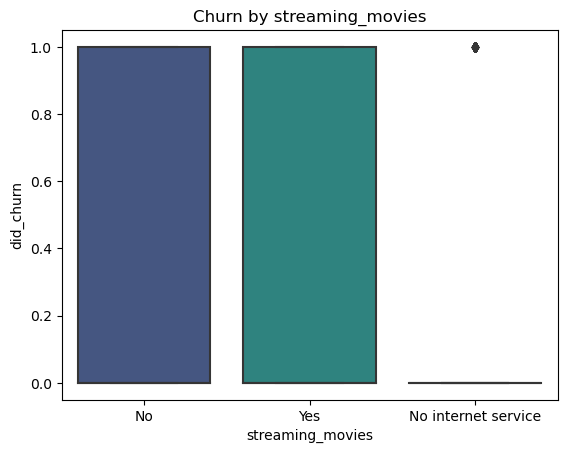

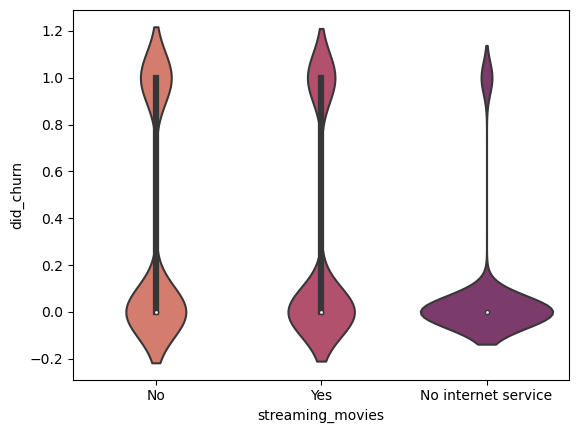

count     3943
unique       3
top         No
freq      1575
Name: streaming_movies, dtype: object
-------------------------------
paperless_billing vs if they did churn


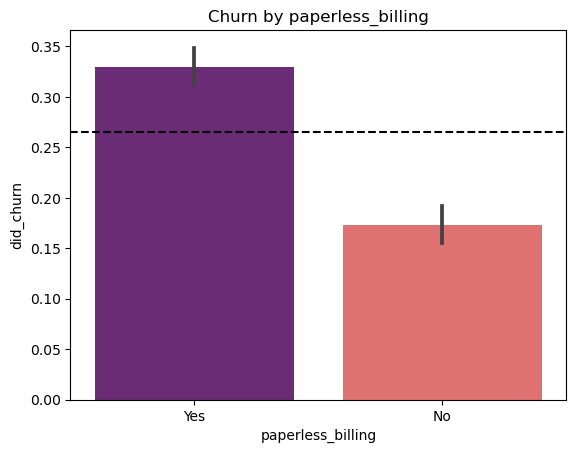

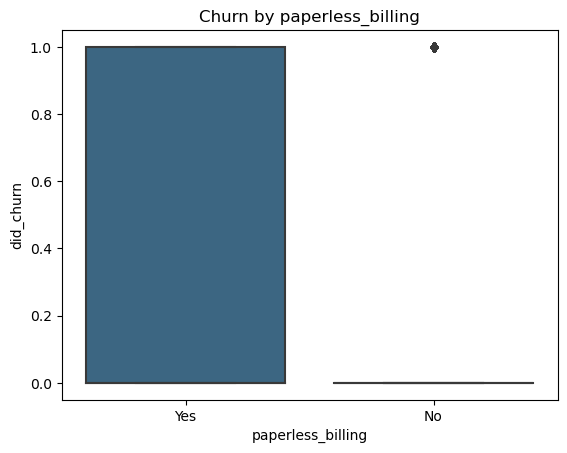

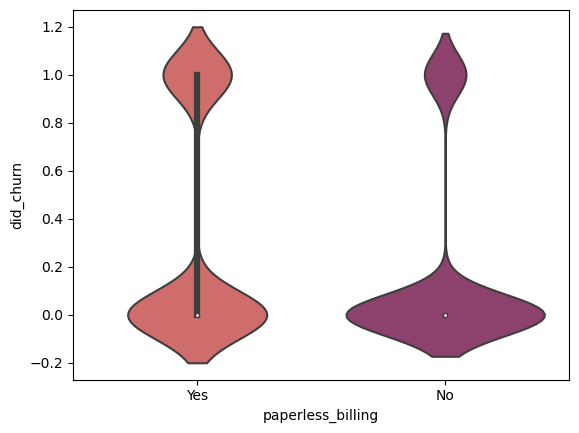

count     3943
unique       2
top        Yes
freq      2317
Name: paperless_billing, dtype: object
-------------------------------
churn vs if they did churn


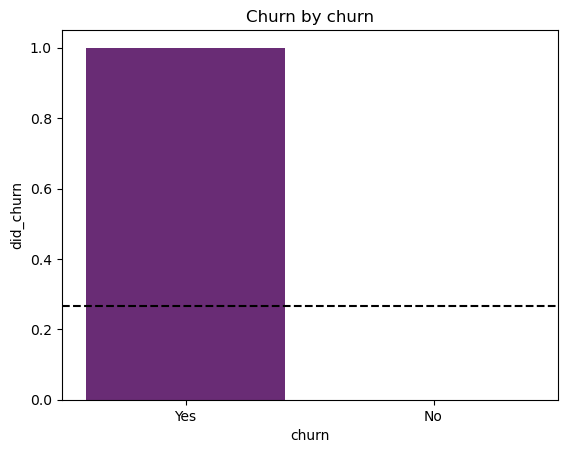

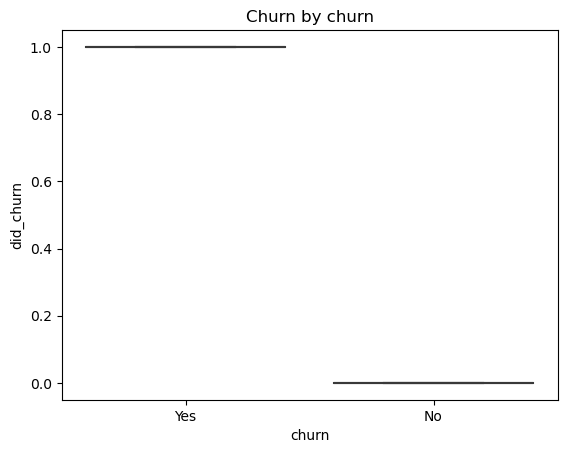

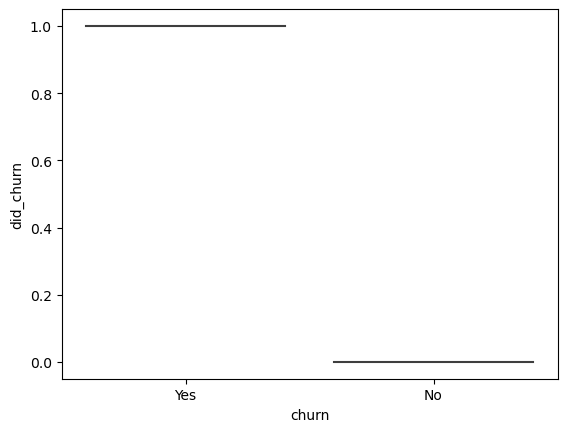

count     3943
unique       2
top         No
freq      2897
Name: churn, dtype: object
-------------------------------
contract_type vs if they did churn


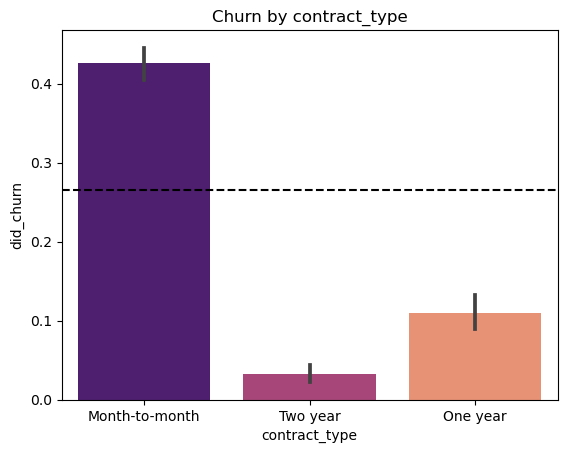

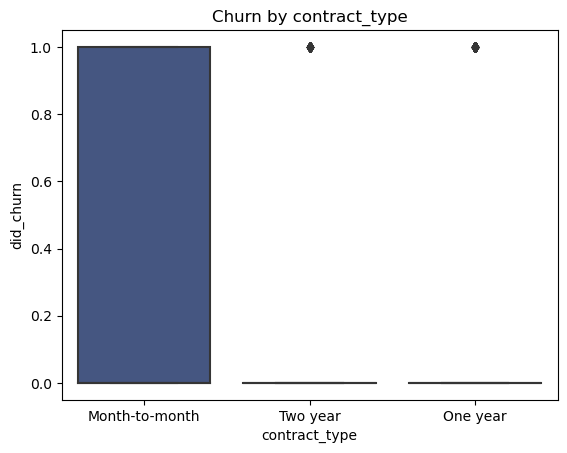

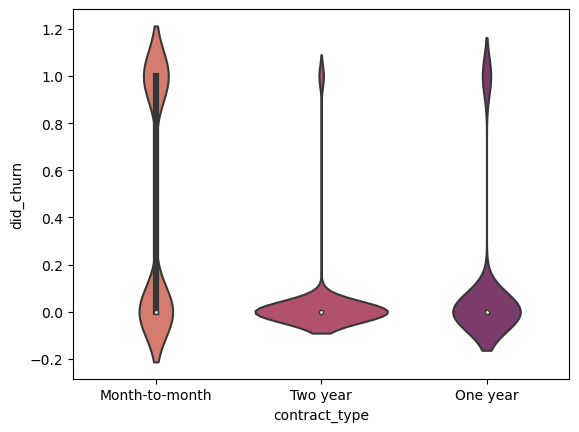

count               3943
unique                 3
top       Month-to-month
freq                2171
Name: contract_type, dtype: object
-------------------------------
internet_service_type vs if they did churn


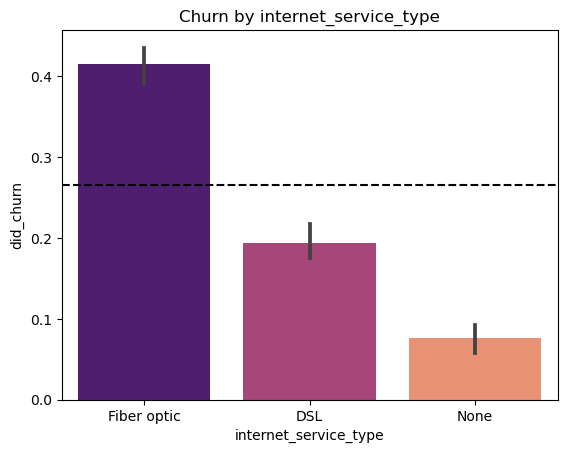

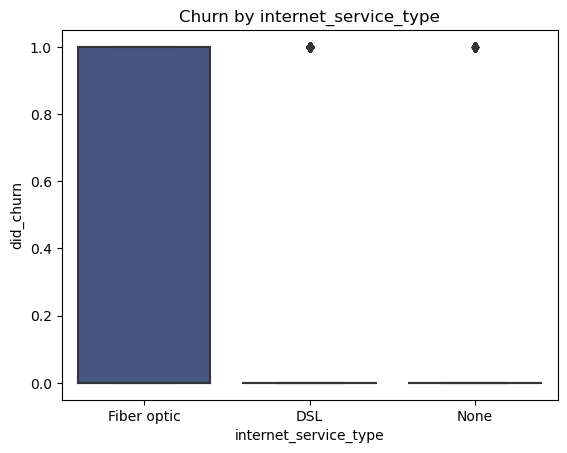

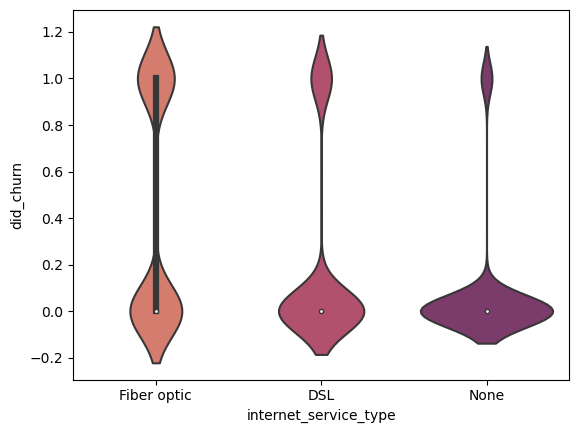

count            3943
unique              3
top       Fiber optic
freq             1717
Name: internet_service_type, dtype: object
-------------------------------
payment_type vs if they did churn


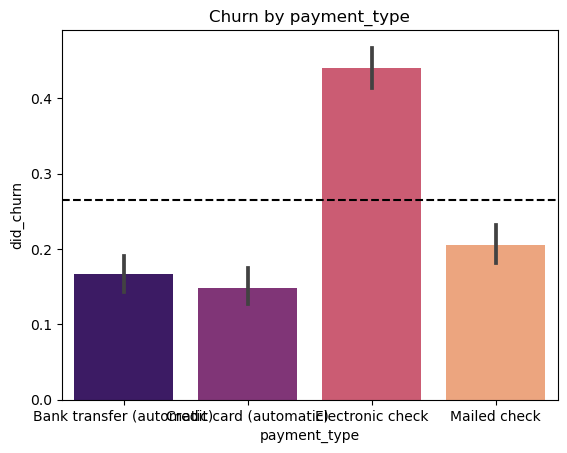

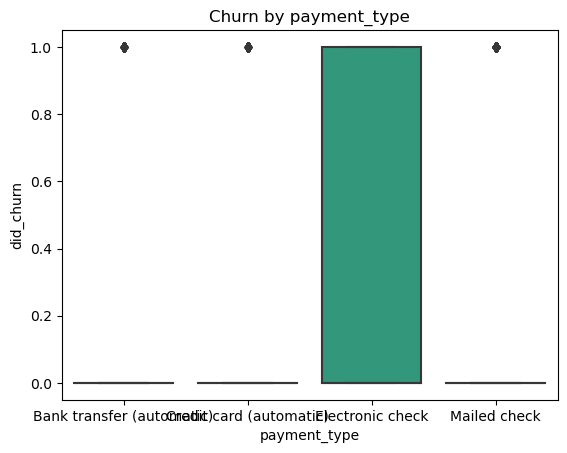

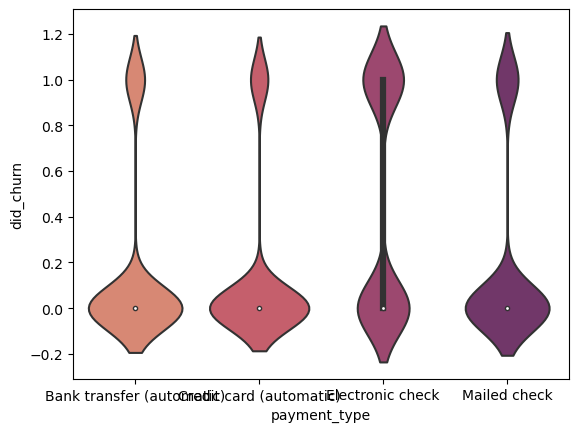

count                 3943
unique                   4
top       Electronic check
freq                  1342
Name: payment_type, dtype: object
-------------------------------


In [41]:
# create a for loop to create all graphs
for col in cat_cols:
    if col != 'did_churn' and col != 'customer_id':
        print(f'{col} vs if they did churn')
        
        # barplot: 
        sns.barplot(data=train, x = col , y = 'did_churn' , palette = 'magma')
        plt.title(f'Churn by {col}')
        overall_rate = train['did_churn'].mean()
        plt.axhline(overall_rate, ls = '--', color = 'black')
        plt.show()
        
        #boxplot
        sns.boxplot(data=train, x = col , y = 'did_churn', palette = 'viridis')
        plt.title(f'Churn by {col}')
        plt.show()
        
        #violin plot
        sns.violinplot(data=train, x = col , y = 'did_churn', palette = 'flare')
        plt.show()
        
        print(train[col].describe())
        print('-------------------------------')
    

#### Calculations: 
- Chi2 test needds to be complted to see if there is a relationship between both categories. 

In [42]:
# complete a chi2 for each column
for col in cat_cols:
    if col != 'customer_id' and col != target:
        # create null and alternative
        print(f'Chi2 test of {col}')
        print(f'H0: {col} is indepndent of {target}')
        print(f'Ha: {col} is dependent of {target}')
        print('-------------------------------------')
        observed = pd.crosstab(train[col],train[target])
        chi2, p, defg, expected = stats.chi2_contingency(observed)
        print(f'''Observed:
        {observed.values}
    
        Expected:
        {expected.astype(int)}
        ________________
    
        ꭓ² = {chi2:.4f}
        p  = {p}''')
        print('-----------------')
        alpha = 0.05
        if p < alpha:
            print(f"""There exists some relationship between {col} and {target}.""")
            print(f'LOOK AT THIS DATA')
        else:
            print(f"""There is not a significant relationship between {col} and {target}.""")
        print('><><><><><><><><><><><><><><><><><')
    
    

Chi2 test of gender
H0: gender is indepndent of did_churn
Ha: gender is dependent of did_churn
-------------------------------------
Observed:
        [[1435  521]
 [1462  525]]
    
        Expected:
        [[1437  518]
 [1459  527]]
        ________________
    
        ꭓ² = 0.0135
        p  = 0.9074232852526496
-----------------
There is not a significant relationship between gender and did_churn.
><><><><><><><><><><><><><><><><><
Chi2 test of senior_citizen
H0: senior_citizen is indepndent of did_churn
Ha: senior_citizen is dependent of did_churn
-------------------------------------
Observed:
        [[2522  773]
 [ 375  273]]
    
        Expected:
        [[2420  874]
 [ 476  171]]
        ________________
    
        ꭓ² = 95.8853
        p  = 1.2173782413917346e-22
-----------------
There exists some relationship between senior_citizen and did_churn.
LOOK AT THIS DATA
><><><><><><><><><><><><><><><><><
Chi2 test of partner
H0: partner is indepndent of did_churn
Ha: partner 

#### Functions: 

In [43]:
# graph function: 
def plot_cat_by_target(train, target, cat_cols):
    for col in cat_cols:
        if col != target and col != 'customer_id':
            print(f'{col} vs if they did churn')
            
            plt.figure(figsize=(8, 5))
            sns.barplot(data=train, x=col, y=target, palette='magma')
            plt.title(f'Churn by {col}')
            overall_rate = train[target].mean()
            plt.axhline(overall_rate, ls='--', color='black')
            plt.show()

In [44]:
#plot_cat_by_target(train, target, cat_cols)

In [45]:
# chi2 function
def run_chi2(train, cat_cols, target):   
    for col in cat_cols:
        if col != 'customer_id' and col != target:
            # create null and alternative
            print(f'Chi2 test of {col}')
            print(f'H0: {col} is indepndent of {target}')
            print(f'Ha: {col} is dependent of {target}')
            print('-------------------------------------')
            observed = pd.crosstab(train[col],train[target])
            chi2, p, defg, expected = stats.chi2_contingency(observed)
            print(f'''Observed:
            {observed.values}
        
            Expected:
            {expected.astype(int)}
            ________________
        
            ꭓ² = {chi2:.4f}
            p  = {p}''')
            print('-----------------')
            alpha = 0.05
            if p < alpha:
                print(f"""There exists some relationship between {col} and {target}.""")
                print(f'LOOK AT THIS DATA')
            else:
                print(f"""There is not a significant relationship between {col} and {target}.""")
                print('><><><><><><><><><><><><><><><><><')
    

In [46]:
#run_chi2(train, cat_cols, target)

In [47]:
def plot_cat_and_run_chi2(train, target, cat_cols):
    for col in cat_cols:
        if col != target and col != 'customer_id':
            # Bar plot
            print(f'{col} vs if they did churn')
            plt.figure(figsize=(8, 5))
            sns.barplot(data=train, x=col, y=target, palette='magma')
            plt.title(f'Churn by {col}')
            overall_rate = train[target].mean()
            plt.axhline(overall_rate, ls='--', color='black')
            plt.show()
            
            # Chi-squared test
            print(f'Chi2 test of {col}')
            print(f'H0: {col} is independent of {target}')
            print(f'Ha: {col} is dependent on {target}')
            print('-------------------------------------')
            observed = pd.crosstab(train[col], train[target])
            chi2, p, df, expected = stats.chi2_contingency(observed)
            print(f'''Observed:
            {observed.values}
        
            Expected:
            {expected.astype(int)}
            ________________
        
            ꭓ² = {chi2:.4f}
            p  = {p}''')
            print('-----------------')
            alpha = 0.05
            if p < alpha:
                print(f"""There exists some relationship between {col} and {target}.""")
                print(f'LOOK AT THIS DATA')
            else:
                print(f"""There is not a significant relationship between {col} and {target}.""")
                print('><><><><><><><><><><><><><><><><><')

senior_citizen vs if they did churn


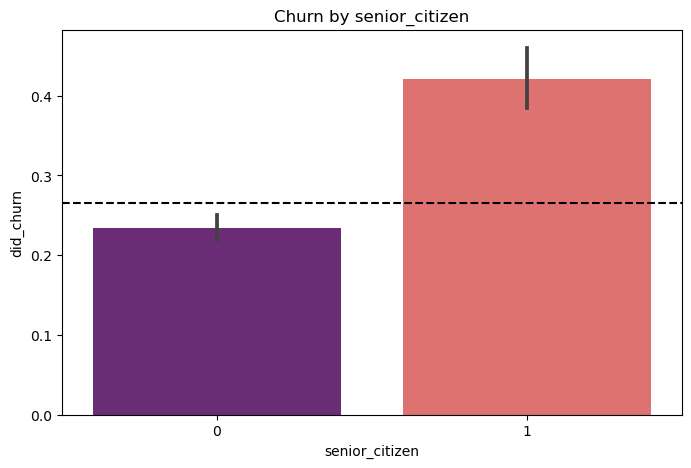

contract_type vs if they did churn


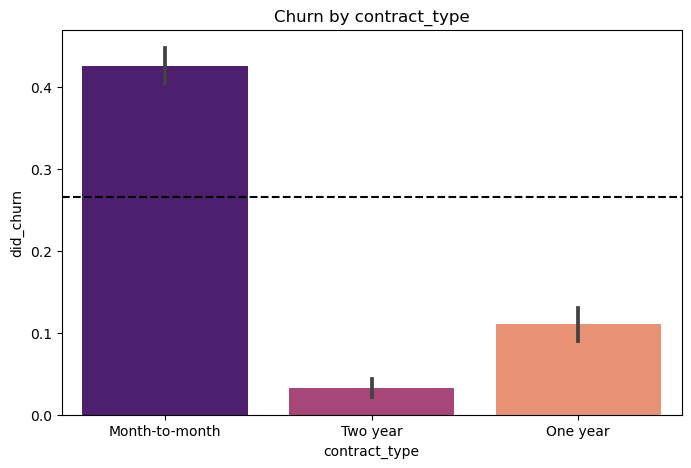

internet_service_type vs if they did churn


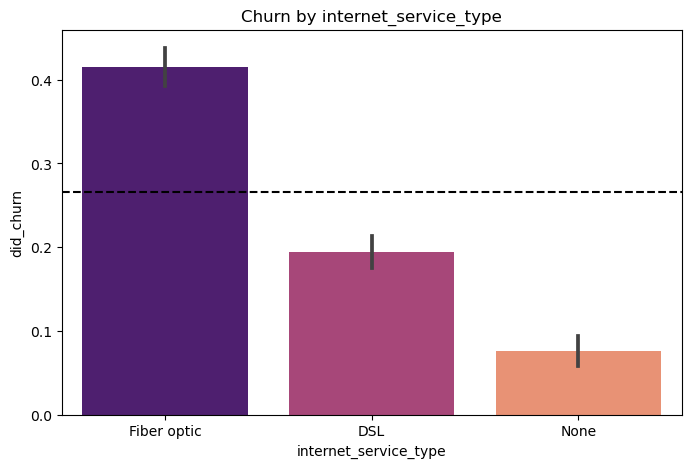

payment_type vs if they did churn


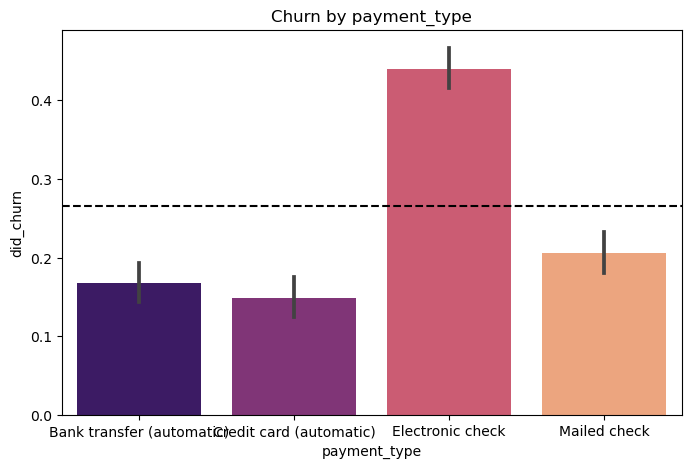

In [48]:
col_list = ['senior_citizen', 'contract_type', 'internet_service_type', 'payment_type']
target = 'did_churn'
for col in col_list: 
    print(f'{col} vs if they did churn')
    plt.figure(figsize=(8, 5)) 
    sns.barplot(data=train, x=col, y=target, palette='magma')
    plt.title(f'Churn by {col}')
    overall_rate = train[target].mean()
    plt.axhline(overall_rate, ls='--', color='black')
    plt.show()

gender vs if they did churn


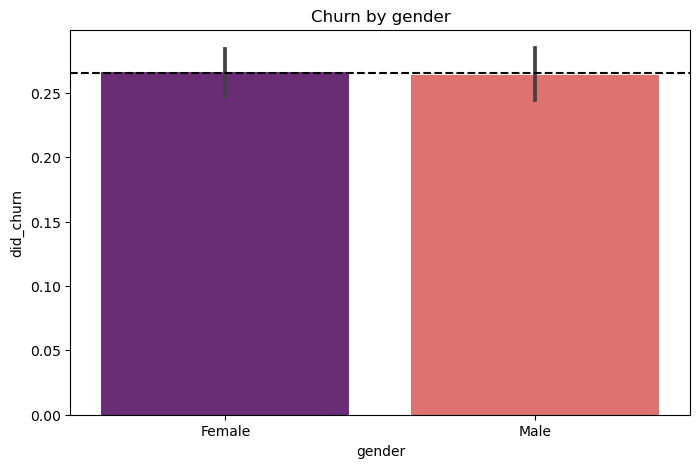

Chi2 test of gender
H0: gender is independent of did_churn
Ha: gender is dependent on did_churn
-------------------------------------
Observed:
            [[1435  521]
 [1462  525]]
        
            Expected:
            [[1437  518]
 [1459  527]]
            ________________
        
            ꭓ² = 0.0135
            p  = 0.9074232852526496
-----------------
There is not a significant relationship between gender and did_churn.
><><><><><><><><><><><><><><><><><
senior_citizen vs if they did churn


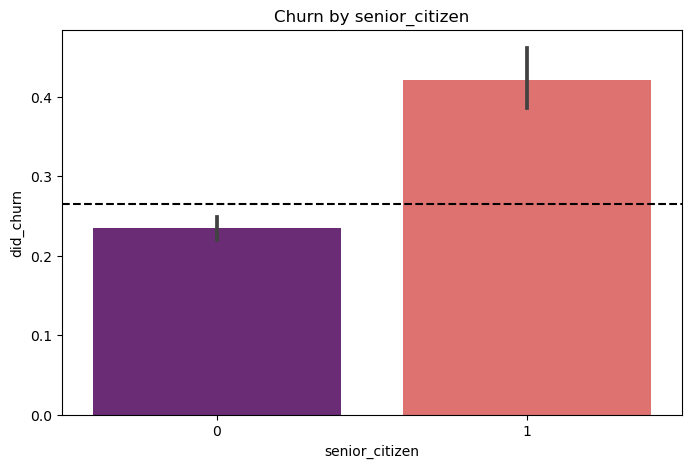

Chi2 test of senior_citizen
H0: senior_citizen is independent of did_churn
Ha: senior_citizen is dependent on did_churn
-------------------------------------
Observed:
            [[2522  773]
 [ 375  273]]
        
            Expected:
            [[2420  874]
 [ 476  171]]
            ________________
        
            ꭓ² = 95.8853
            p  = 1.2173782413917346e-22
-----------------
There exists some relationship between senior_citizen and did_churn.
LOOK AT THIS DATA
partner vs if they did churn


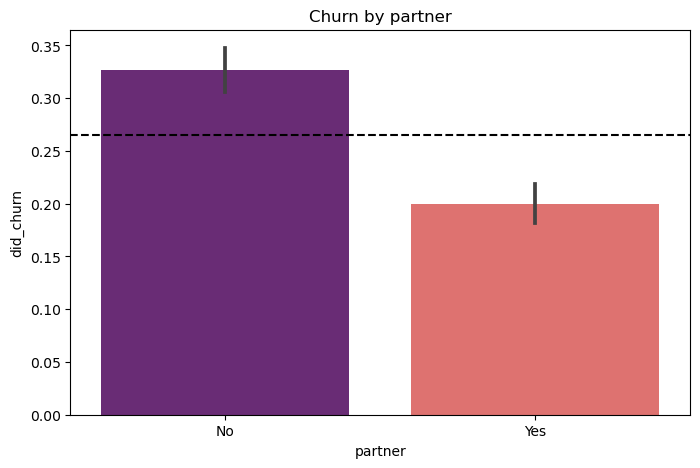

Chi2 test of partner
H0: partner is independent of did_churn
Ha: partner is dependent on did_churn
-------------------------------------
Observed:
            [[1372  665]
 [1525  381]]
        
            Expected:
            [[1496  540]
 [1400  505]]
            ________________
        
            ꭓ² = 80.2784
            p  = 3.252030764088692e-19
-----------------
There exists some relationship between partner and did_churn.
LOOK AT THIS DATA
dependents vs if they did churn


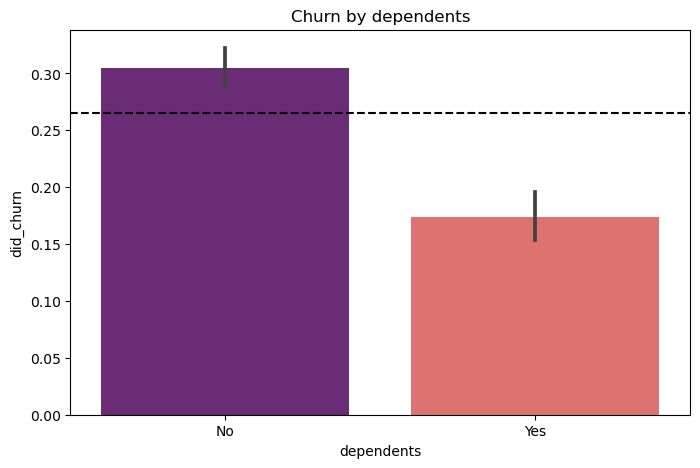

Chi2 test of dependents
H0: dependents is independent of did_churn
Ha: dependents is dependent on did_churn
-------------------------------------
Observed:
            [[1918  840]
 [ 979  206]]
        
            Expected:
            [[2026  731]
 [ 870  314]]
            ________________
        
            ꭓ² = 72.0087
            p  = 2.1425150617073534e-17
-----------------
There exists some relationship between dependents and did_churn.
LOOK AT THIS DATA
phone_service vs if they did churn


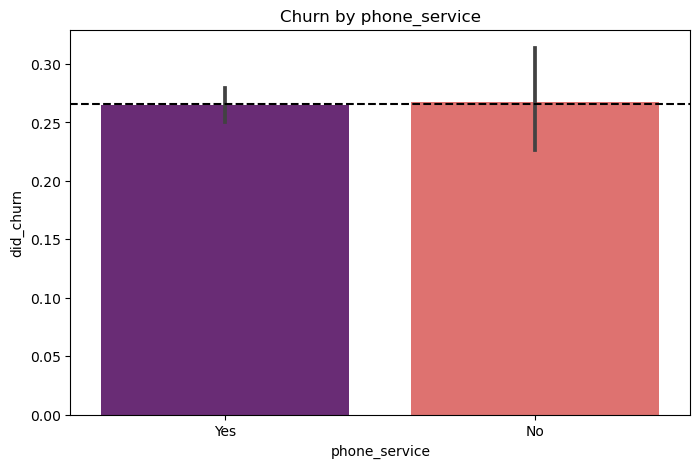

Chi2 test of phone_service
H0: phone_service is independent of did_churn
Ha: phone_service is dependent on did_churn
-------------------------------------
Observed:
            [[ 285  104]
 [2612  942]]
        
            Expected:
            [[ 285  103]
 [2611  942]]
            ________________
        
            ꭓ² = 0.0014
            p  = 0.9704737688044196
-----------------
There is not a significant relationship between phone_service and did_churn.
><><><><><><><><><><><><><><><><><
multiple_lines vs if they did churn


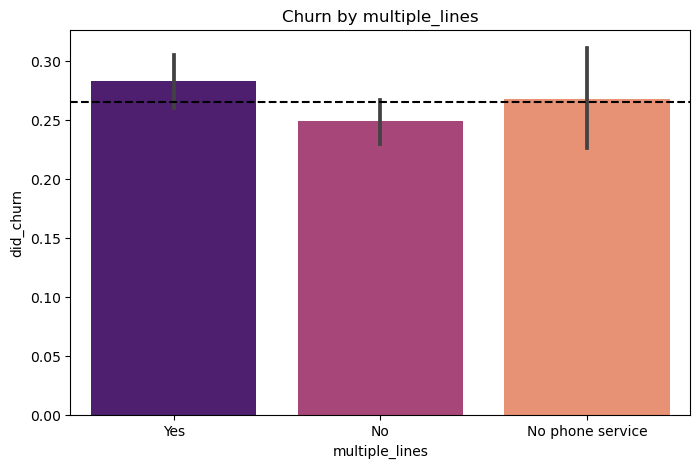

Chi2 test of multiple_lines
H0: multiple_lines is independent of did_churn
Ha: multiple_lines is dependent on did_churn
-------------------------------------
Observed:
            [[1424  473]
 [ 285  104]
 [1188  469]]
        
            Expected:
            [[1393  503]
 [ 285  103]
 [1217  439]]
            ________________
        
            ꭓ² = 5.1632
            p  = 0.07565205131032109
-----------------
There is not a significant relationship between multiple_lines and did_churn.
><><><><><><><><><><><><><><><><><
online_security vs if they did churn


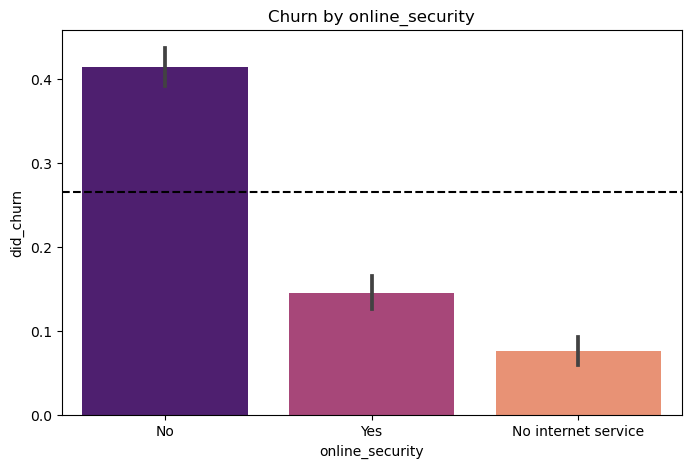

Chi2 test of online_security
H0: online_security is independent of did_churn
Ha: online_security is dependent on did_churn
-------------------------------------
Observed:
            [[1156  818]
 [ 778   64]
 [ 963  164]]
        
            Expected:
            [[1450  523]
 [ 618  223]
 [ 828  298]]
            ________________
        
            ꭓ² = 462.8636
            p  = 3.0934205345492425e-101
-----------------
There exists some relationship between online_security and did_churn.
LOOK AT THIS DATA
online_backup vs if they did churn


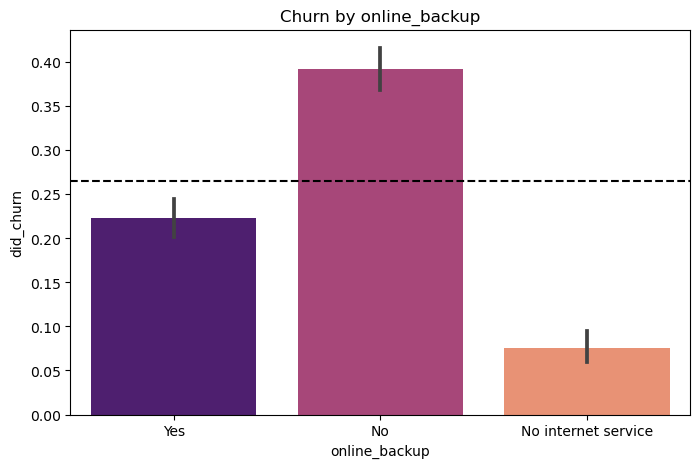

Chi2 test of online_backup
H0: online_backup is independent of did_churn
Ha: online_backup is dependent on did_churn
-------------------------------------
Observed:
            [[1040  672]
 [ 778   64]
 [1079  310]]
        
            Expected:
            [[1257  454]
 [ 618  223]
 [1020  368]]
            ________________
        
            ꭓ² = 309.6028
            p  = 5.89667328998213e-68
-----------------
There exists some relationship between online_backup and did_churn.
LOOK AT THIS DATA
device_protection vs if they did churn


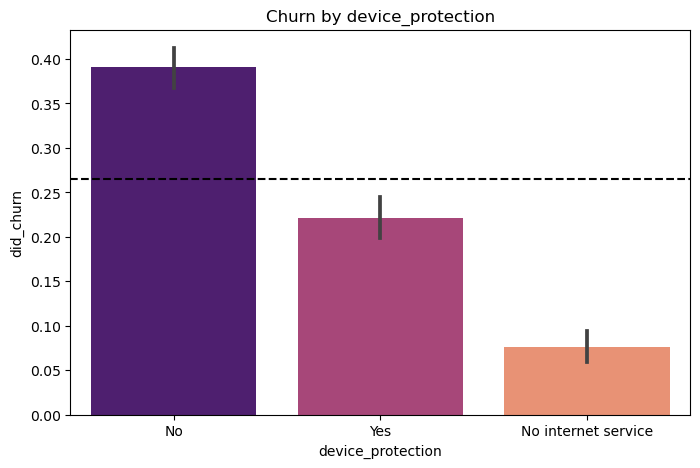

Chi2 test of device_protection
H0: device_protection is independent of did_churn
Ha: device_protection is dependent on did_churn
-------------------------------------
Observed:
            [[1064  682]
 [ 778   64]
 [1055  300]]
        
            Expected:
            [[1282  463]
 [ 618  223]
 [ 995  359]]
            ________________
        
            ꭓ² = 308.8462
            p  = 8.607790108881741e-68
-----------------
There exists some relationship between device_protection and did_churn.
LOOK AT THIS DATA
tech_support vs if they did churn


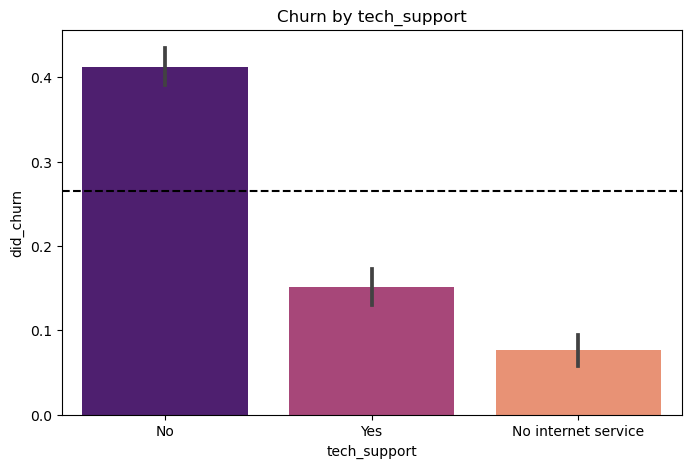

Chi2 test of tech_support
H0: tech_support is independent of did_churn
Ha: tech_support is dependent on did_churn
-------------------------------------
Observed:
            [[1157  810]
 [ 778   64]
 [ 962  172]]
        
            Expected:
            [[1445  521]
 [ 618  223]
 [ 833  300]]
            ________________
        
            ꭓ² = 446.4871
            p  = 1.113180830377994e-97
-----------------
There exists some relationship between tech_support and did_churn.
LOOK AT THIS DATA
streaming_tv vs if they did churn


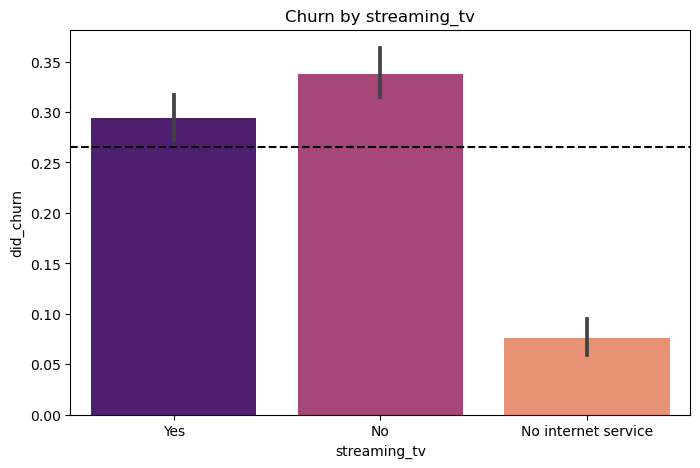

Chi2 test of streaming_tv
H0: streaming_tv is independent of did_churn
Ha: streaming_tv is dependent on did_churn
-------------------------------------
Observed:
            [[1043  533]
 [ 778   64]
 [1076  449]]
        
            Expected:
            [[1157  418]
 [ 618  223]
 [1120  404]]
            ________________
        
            ꭓ² = 204.3972
            p  = 4.1277620409969264e-45
-----------------
There exists some relationship between streaming_tv and did_churn.
LOOK AT THIS DATA
streaming_movies vs if they did churn


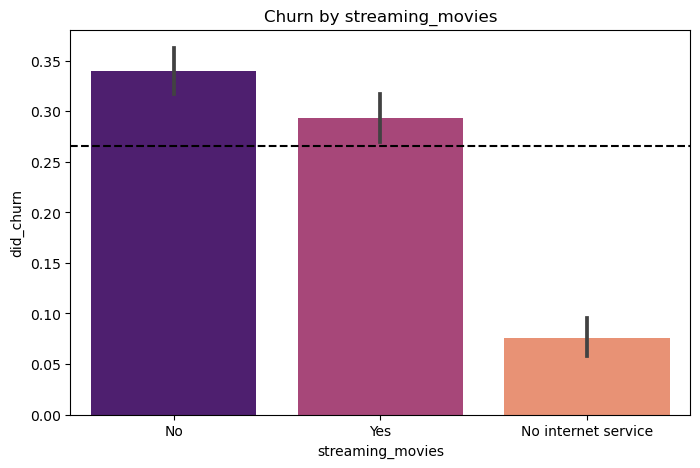

Chi2 test of streaming_movies
H0: streaming_movies is independent of did_churn
Ha: streaming_movies is dependent on did_churn
-------------------------------------
Observed:
            [[1040  535]
 [ 778   64]
 [1079  447]]
        
            Expected:
            [[1157  417]
 [ 618  223]
 [1121  404]]
            ________________
        
            ꭓ² = 205.4731
            p  = 2.4103885868326314e-45
-----------------
There exists some relationship between streaming_movies and did_churn.
LOOK AT THIS DATA
paperless_billing vs if they did churn


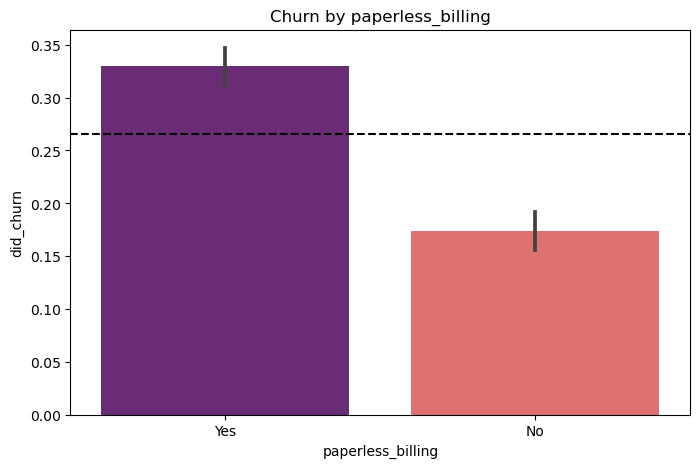

Chi2 test of paperless_billing
H0: paperless_billing is independent of did_churn
Ha: paperless_billing is dependent on did_churn
-------------------------------------
Observed:
            [[1344  282]
 [1553  764]]
        
            Expected:
            [[1194  431]
 [1702  614]]
            ________________
        
            ꭓ² = 118.9669
            p  = 1.0649358983445027e-27
-----------------
There exists some relationship between paperless_billing and did_churn.
LOOK AT THIS DATA
churn vs if they did churn


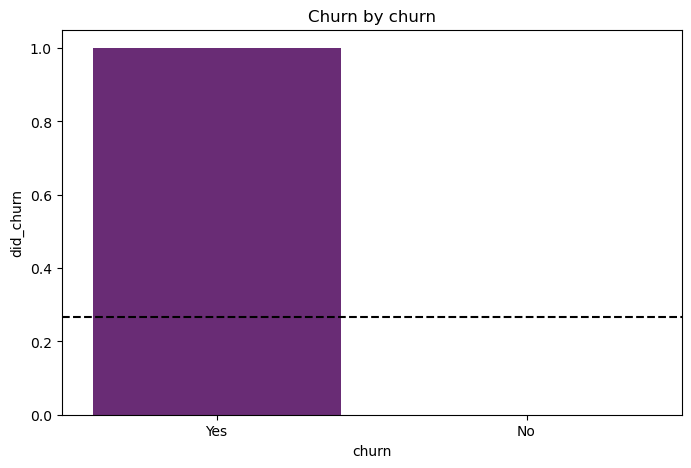

Chi2 test of churn
H0: churn is independent of did_churn
Ha: churn is dependent on did_churn
-------------------------------------
Observed:
            [[2897    0]
 [   0 1046]]
        
            Expected:
            [[2128  768]
 [ 768  277]]
            ________________
        
            ꭓ² = 3937.8710
            p  = 0.0
-----------------
There exists some relationship between churn and did_churn.
LOOK AT THIS DATA
contract_type vs if they did churn


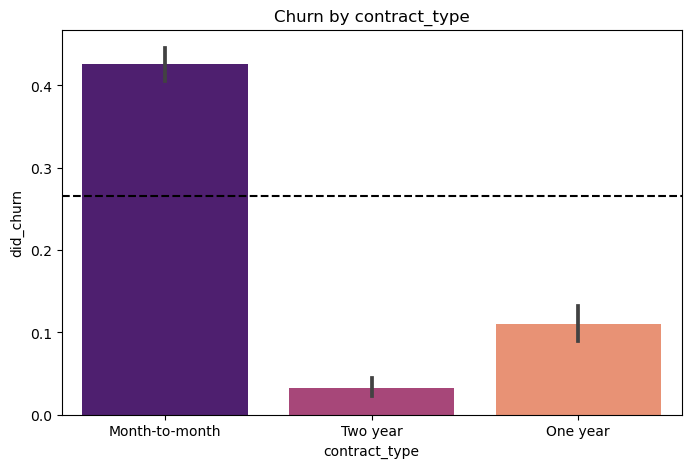

Chi2 test of contract_type
H0: contract_type is independent of did_churn
Ha: contract_type is dependent on did_churn
-------------------------------------
Observed:
            [[1247  924]
 [ 735   91]
 [ 915   31]]
        
            Expected:
            [[1595  575]
 [ 606  219]
 [ 695  250]]
            ________________
        
            ꭓ² = 650.6812
            p  = 5.086019119486488e-142
-----------------
There exists some relationship between contract_type and did_churn.
LOOK AT THIS DATA
internet_service_type vs if they did churn


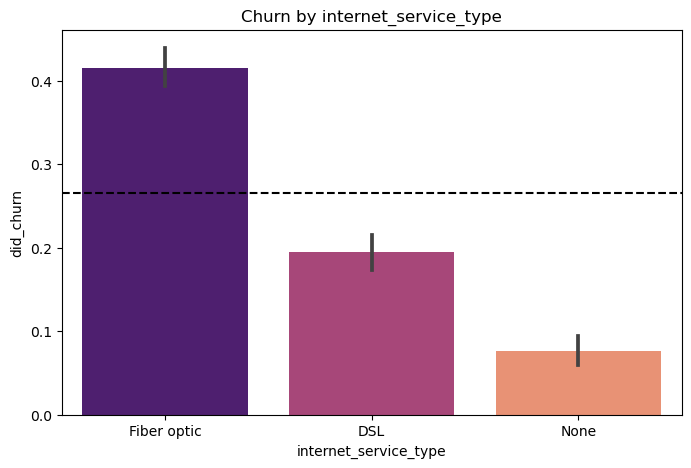

Chi2 test of internet_service_type
H0: internet_service_type is independent of did_churn
Ha: internet_service_type is dependent on did_churn
-------------------------------------
Observed:
            [[1115  269]
 [1004  713]
 [ 778   64]]
        
            Expected:
            [[1016  367]
 [1261  455]
 [ 618  223]]
            ________________
        
            ꭓ² = 388.6231
            p  = 4.0884960860642045e-85
-----------------
There exists some relationship between internet_service_type and did_churn.
LOOK AT THIS DATA
payment_type vs if they did churn


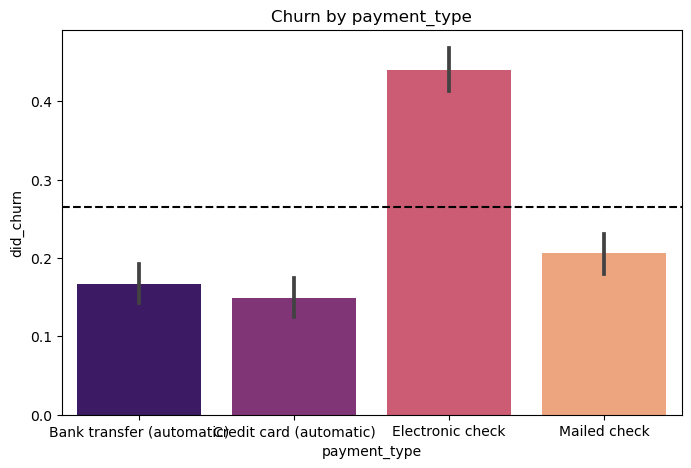

Chi2 test of payment_type
H0: payment_type is independent of did_churn
Ha: payment_type is dependent on did_churn
-------------------------------------
Observed:
            [[712 143]
 [692 121]
 [752 590]
 [741 192]]
        
            Expected:
            [[628 226]
 [597 215]
 [985 356]
 [685 247]]
            ________________
        
            ꭓ² = 324.9898
            p  = 3.877716949659107e-70
-----------------
There exists some relationship between payment_type and did_churn.
LOOK AT THIS DATA


In [49]:
plot_cat_and_run_chi2(train, target, cat_cols)

#### Takeaways
- Gender:
    - no significanve
- **Senior Citizen**:
    - More elderly churn
    - significant difference
    - some relationship between churn
- Partner:
    - more single people churn
    - some relationship between churn
- Dependents:
    - Less dependents churn compared to dependents
    - some relationship between churn
- Phone service:
    - no big difference
- Multiple lines:
    - no big differnece
- Internet security
    - people with no security churn more often
- Online backup
    - no online backup churned more often than yes, and no internet service
- Device protection:
    - People who dont have device protection churn more
- Tech support:
    - people with no tech support churn more often
- Streaming Tv:
    - people who have no streaming for tv churn more often
- Streaming movies:
    - people who have no movie streming churn more often
- Paperless billing
    - people who pay by paperless billing churn more
- **contract type**:
    - significant churn rate for month to month compare to others
- **internet_sercive_type**:
    - people who use fiber churn more
- **payment type**:
    - people who pay by electronic check chrun more

## Multivariate testing:
What may influnce churn? <br>
1. Numerical Varibales: <br>
    - monthly_charges
2. Categorical Variables: <br>
    - senior_citizen: is a old person
    - contract type: month to month
    - internet_service_type: fiber optic
    - payment type: electronic check

What to explore <br>
Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent churn.

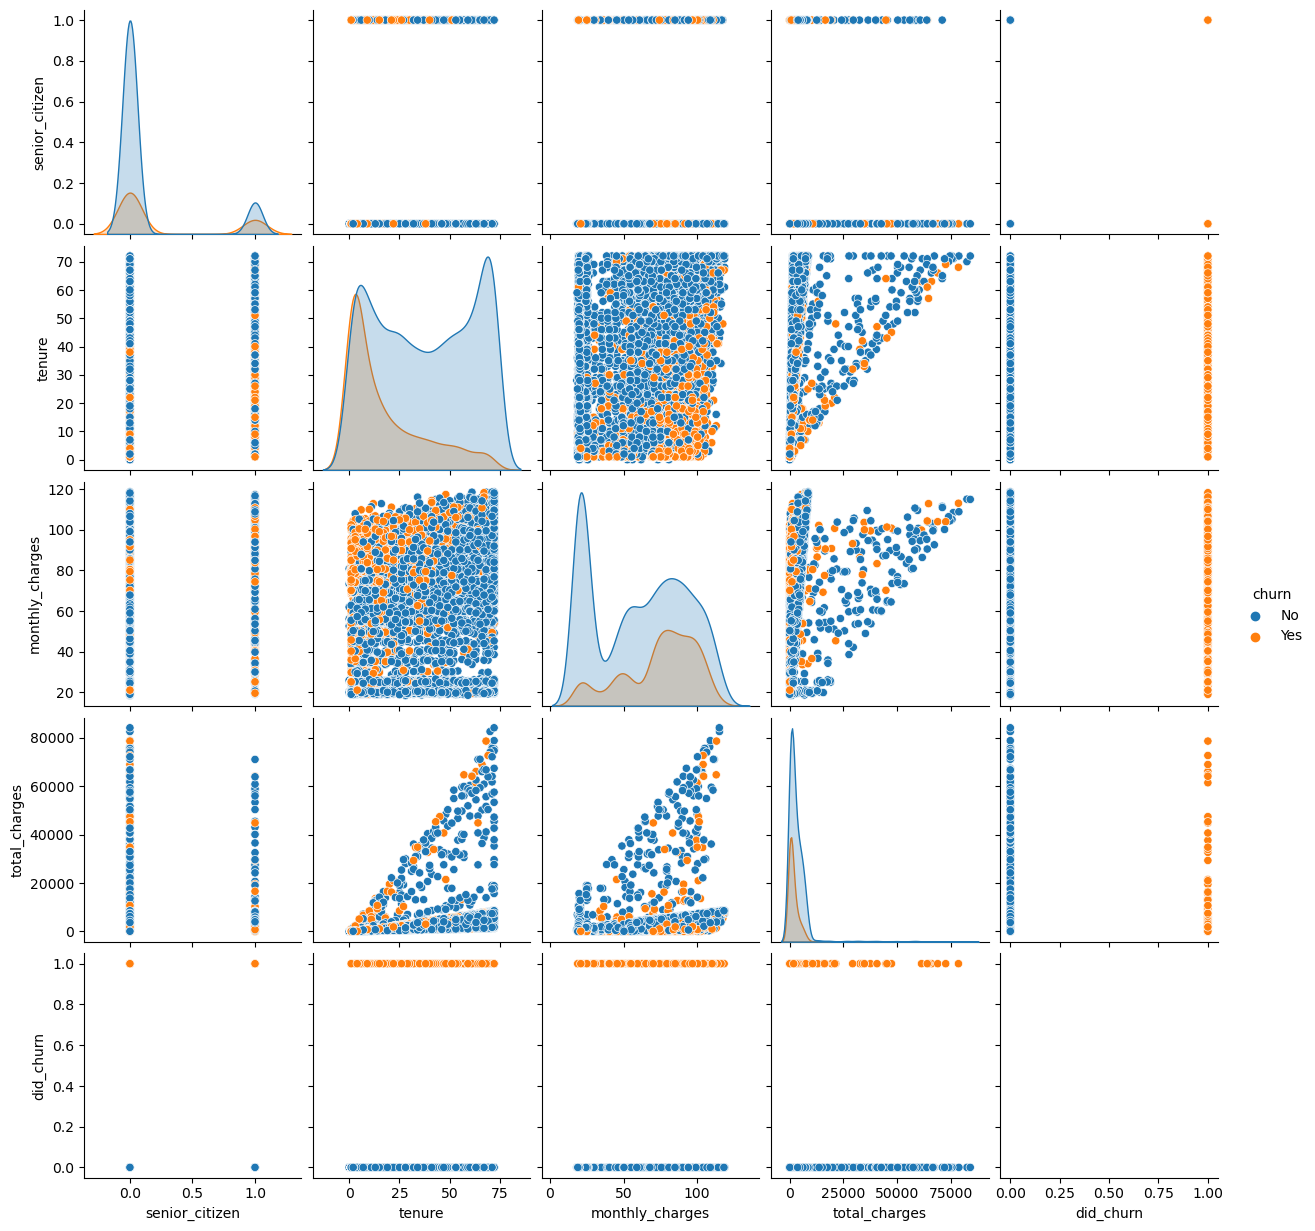

In [50]:
sns.pairplot(telco, hue = 'churn')
plt.show()